# **Predicting Loan Defaults**

##<b>Problem Definition</b>

**The context:** Why is this problem important to solve?<br>

* Approving the loan requires a meticulous and highly manual process of checking creditworthiness of the applicant based on his or her past credit history. Because it requires a significant amount of human effort with the process, the task is not only time-consuming but also prone to error and bias based on human decision-making.
    
**The objectives:** What is the intended goal?<br>
    
* The goal is to automate the approval process of the applicant with respect to the loan such that the model will ensure the bias and error will be minimized, and the bank can efficiently decline which applicants are more prone to the default. Essentially, we are reducing the time it takes to approve the application and automating the approval process while minimizing the erorr rate.
    
**The key questions:** What are the key questions that need to be answered?<br>

* Which features have the biggest impact on the creditworthiness of each applicant?
* Will the model accurately track and approve low-risk groups compared to high-risk groups?

**The problem formulation:** What is it that we are trying to solve using data science?

* We want to maximize the Precision-Recall, or F-1 Score, Rate while concurrently minimize the False Negative and False Positive for each application approval.
* We want to build the optimal model that can formulate the most efficient, automated machine learning algorithm that can decide the creditworthiness of each applicant without human intervention.

## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property. 

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts) 

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments). 

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due). 

* **CLAGE:** Age of the oldest credit line in months. 

* **NINQ:** Number of recent credit inquiries. 

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

## <b>Important Notes</b>

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook would give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise. 

- In the notebook, there are markdowns cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they want to explore different techniques. 

### **Import the necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

import scipy.stats as stats

from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (6.4, 4.8)

### **Read the dataset**

In [2]:
hm=pd.read_csv("hmeq.csv")

In [3]:
# Copying data to another variable to avoid any changes to original data
data=hm.copy()

### **Print the first and last 5 rows of the dataset**

In [4]:
# Display first five rows
data.head()

BAD  LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0    1  1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1    1  1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0   
2    1  1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3    1  1500      NaN       NaN      NaN     NaN   NaN    NaN     NaN   
4    0  1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   

        CLAGE  NINQ  CLNO  DEBTINC  
0   94.366667   1.0   9.0      NaN  
1  121.833333   0.0  14.0      NaN  
2  149.466667   1.0  10.0      NaN  
3         NaN   NaN   NaN      NaN  
4   93.333333   0.0  14.0      NaN

In [5]:
# Display last 5 rows
data.tail()

BAD   LOAN  MORTDUE    VALUE   REASON    JOB   YOJ  DEROG  DELINQ  \
5955    0  88900  57264.0  90185.0  DebtCon  Other  16.0    0.0     0.0   
5956    0  89000  54576.0  92937.0  DebtCon  Other  16.0    0.0     0.0   
5957    0  89200  54045.0  92924.0  DebtCon  Other  15.0    0.0     0.0   
5958    0  89800  50370.0  91861.0  DebtCon  Other  14.0    0.0     0.0   
5959    0  89900  48811.0  88934.0  DebtCon  Other  15.0    0.0     0.0   

           CLAGE  NINQ  CLNO    DEBTINC  
5955  221.808718   0.0  16.0  36.112347  
5956  208.692070   0.0  15.0  35.859971  
5957  212.279697   0.0  15.0  35.556590  
5958  213.892709   0.0  16.0  34.340882  
5959  219.601002   0.0  16.0  34.571519

### **Understand the shape of the dataset**

In [6]:
# Check the shape of the data
data.shape

(5960, 13)

**Insights**
* There are 5,960 rows and 13 columns.

### **Check the data types of the columns**

In [7]:
# Check info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


**Insights**
* `BAD` and `LOAN` are the only columns that have full rows of non-null values.
* The rest of columns do have NULL values, with `DEBTINC` having the most NULL rows out of other columns.
* It seems that only `REASON` and `JOB` have data type of `object`.
* The target variable will be `BAD`, so we will have to change this data type to `category`. Additionally, we will undergo the same process for `REASON` and `JOB` from`object` to `category`.


### **Check for missing values**

In [8]:
# Analyse missing values - Hint: use isnull() function
data.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [9]:
# Check the percentage of missing values in the each column.
# Hint: divide the result from the previous code by the number of rows in the dataset
round(data.isnull().sum()/len(data),3)

BAD        0.000
LOAN       0.000
MORTDUE    0.087
VALUE      0.019
REASON     0.042
JOB        0.047
YOJ        0.086
DEROG      0.119
DELINQ     0.097
CLAGE      0.052
NINQ       0.086
CLNO       0.037
DEBTINC    0.213
dtype: float64

**Insights**
* `DEBTINC` have 21% of the data with NULL values. `DEROG` and `DELINQ` follow after in terms of the percentage of NULL data, around 12% and 10% respectively.
* Not surprisignly, `BAD` and `LOAN` have no NULL value, so the result shows 0%.

### **Think about it:**
- We found the total number of missing values and the percentage of missing values, which is better to consider?
    * In this scenario, it will be better to approach the data with a percentage of missing values since the result provides the estimate of whether the variable will provide a useful datapoint to the model. If the percentage of missing values surpasses the certain threshold, then it can alternatively give us a guidance if we want to fill the NULL value with mean or median values or discard it altogether.
- What can be the limit for % missing values in a column in order to avoid it and what are the challenges associated with filling them and avoiding them? 
    * There exists a certain boundary for % missing values such that the more NULL values the data has, the higher chance it will create a bias with the model if we move forward with the missing data. This is the part that where we have to decide if the variable is worth enough to keep the data as it is or fill the NULL value with other values such as mean or median. In my perspective, `DEBTINC` is one of the key variables to predict whether the loan requestor will be defaulting or not, so I will be filling the NULL value with median so that it will not be impacted by outliers.

**We can convert the object type columns to categories**

`converting "objects" to "category" reduces the data space required to store the dataframe`

### **Convert the data types**

In [10]:
cols = data.select_dtypes(['object']).columns.tolist()

#adding target variable to this list as this is an classification problem and the target variable is categorical
cols.append('BAD')

In [11]:
cols

['REASON', 'JOB', 'BAD']

In [12]:
# Changing the data type of object type column to category. hint use astype() function
for i in cols:
    data[i] = data[i].astype('category')

In [13]:
# Checking the info again and the datatype of different variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.7 KB


**Important Note**
* `DEROG`, `DELINQ`, `NINQ`, `YOJ`, and `CLNO` are discrete numeric variables. We will keep this in mind before further analyzing.

### **Analyze Summary Statistics of the dataset**

In [14]:
# Analyze the summary statistics for numerical variables
data.describe().T

count           mean           std          min           25%  \
LOAN     5960.0   18607.969799  11207.480417  1100.000000  11100.000000   
MORTDUE  5442.0   73760.817200  44457.609458  2063.000000  46276.000000   
VALUE    5848.0  101776.048741  57385.775334  8000.000000  66075.500000   
YOJ      5445.0       8.922268      7.573982     0.000000      3.000000   
DEROG    5252.0       0.254570      0.846047     0.000000      0.000000   
DELINQ   5380.0       0.449442      1.127266     0.000000      0.000000   
CLAGE    5652.0     179.766275     85.810092     0.000000    115.116702   
NINQ     5450.0       1.186055      1.728675     0.000000      0.000000   
CLNO     5738.0      21.296096     10.138933     0.000000     15.000000   
DEBTINC  4693.0      33.779915      8.601746     0.524499     29.140031   

                  50%            75%            max  
LOAN     16300.000000   23300.000000   89900.000000  
MORTDUE  65019.000000   91488.000000  399550.000000  
VALUE    89235.500000  119824.250000  855909.000000  
YOJ          7.000000      13.000000      41.000000  
DEROG        0.000000       0.000000      10.000000  
DELINQ       0.000000       0.000000      15.000000  
CLAGE      173.466667     231.562278    1168.233561  
NINQ         1.000000       2.000000      17.000000  
CLNO        20.000000      26.000000      71.000000  
DEBTINC     34.818262      39.003141     203.312149

**Insights**
* `LOAN` shows a significantly deviated maximum of 89.9K dollars compared to the mean and median. On surface, this seems to be related to the `VALUE` of the home property showing a close amount of 85.6K dollars. We will need to do a separate verification if this is actually true.
* `MORTDUE`, too, also shows an outlier of 399.6K dollars of loans. Compared to median and mean, the outlier is too big; this will inevitably inflate `DEBTINC`, so a separate check will be needed.
* `YOJ` shows that a person has worked for 41 years. This means he has worked since 20's. While this sounds legitimate, we will need to corroborate if this is an outlier.
* `DEROG` shows that there is 1 or a few people who have around 10 derogatory reports; note that the rest of the people reported no late payments or serious delinquency. There is a high chance that this person would have defaulted on the loan, but we will have to confirm if this is true. Nevertheless, this variable seems to not be a good measurement for the model but a confirmation will be a good idea.
* `DELINQ` also shows a similiar pattern such that 1 or a few people have made around 15 delinquent credit lines, while other people reported no delinquent credit lines. On surface, this person will likely default on the loan. Similar to `DEROG`, `DELINQ` seems to be not be a good candidate for the model but a corroboration is required.
* `CLAGE` shows the age of credt lines around 1168 months that equates to around 97 years. On surface, this does not make sense because a person cannot live this long to pay the mortgage unless he/she passes down the mortgage loan to his/her descendents. Additionally, the United States provides a maximum mortage loan of 50 years. Hence, This seems to be an outlier.
* `NINQ` shows a maximum of 17 recent inquiries. This, too, seems to be an outlier because usually, six inquiries are the usual cut-off before the lender denies the loan request for too many inquiries. We will need to see if there are inquiries between 2 (third-quantile) and 17 (max). Regardless, we will check whether this variable is statistically significant.
* `DEBTINC` shows a mean and median of around 34%. 203% definitely shows a sign of defaulting on the loan; we will have to check if this is an outlier. Note that the usual good Debt-to-Income Ratio is 36%.

In [15]:
# Check summary for categorical data - Hint: inside describe function you can use the argument include=['category']
data.describe(include=['category']).T

count unique      top  freq
BAD     5960      2        0  4771
REASON  5708      2  DebtCon  3928
JOB     5681      6    Other  2388

**Insights**
* `BAD` shows that 80% of loans have been repaid. This is a good percentage of people who successfully paid the loan, but it will be interesting to see why the remaining 20% have failed to do so.
* `REASON` shows 252 rows of missing data. Additioanlly, a majority of reasons on the loan request was on the Debt Consolidation.
* `JOB` shows the majority of jobs under Other (42%). It seems that 279 requestors did not provid their job titles. I believe we will need to check what 58% of jobs were categorized to.

**Let's look at the unique values in all the categorical variables**

In [16]:
# Checking the count of unique values in each categorical column 
cols_cat= data.select_dtypes(['category'])

for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(data[i].nunique())
    print('*'*40)

Unique values in BAD are :
2
****************************************
Unique values in REASON are :
2
****************************************
Unique values in JOB are :
6
****************************************


**Insights**
* `BAD` is a binary variable, so 2 unique rows make sense.
* `REASON` only showed two reasons: Home Improvement and Loan Consolidation.
* `JOB` showed 6 categories of jobs, with `Other` showing the most frequencies from the analysis above.

### **Think about it**
- The results above gave the absolute count of unique values in each categorical column. Are absolute values a good measure? 
- If not, what else can be used? Try implementing that. 

## **Exploratory Data Analysis (EDA) and Visualization**

## **Univariate Analysis**

Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables

### **1. Univariate Analysis - Numerical Data**
Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyze the numerical columns.

In [17]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and return the boxplots and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    print('Skew :', round(feature.skew(), 2))
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.nanmedian(feature), color='black', linestyle='-') # Add median to the histogram
    plt.show()

#### Using the above function, let's first analyze the Histogram and Boxplot for LOAN

Skew : 2.02


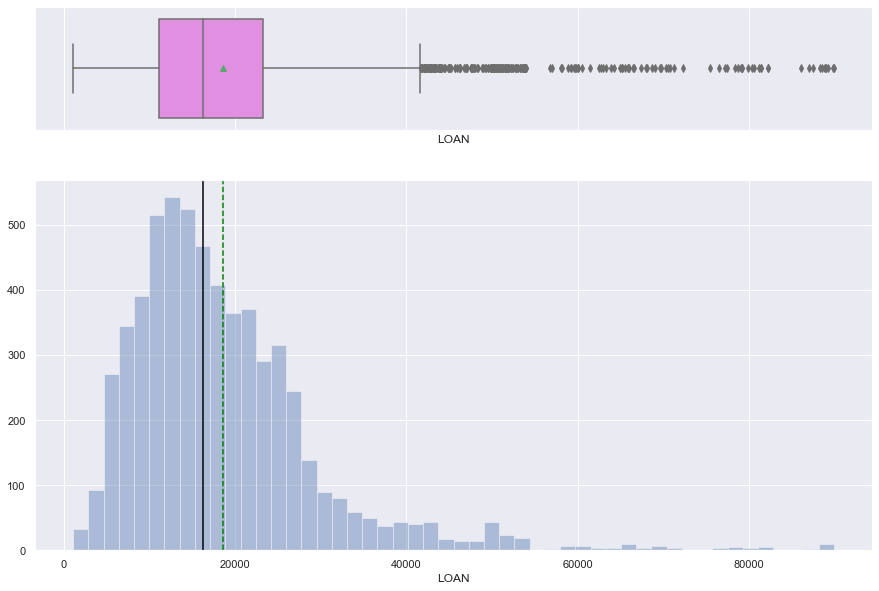

In [18]:
histogram_boxplot(data['LOAN'])

**Insights**
* `LOAN` shows right-skewed distribution of 2.02, with a significant number of approved loans above mean (18.6K) and median (16.3K). It seems that an approved home loan of 89.9K dollars from the above summary is a possible but rare scenario.
* Checking the data to see whether the data is beyond 1.5 times of IQR range will be a good idea.

#### **Note:** As done above, analyze Histogram and Boxplot for other variables

In [19]:
# Create numeric columns except LOAN
num_col = ['MORTDUE','VALUE','YOJ','DEROG','DELINQ','CLAGE','NINQ','CLNO','DEBTINC']

Histogram & Boxplot for MORTDUE
Skew : 1.81


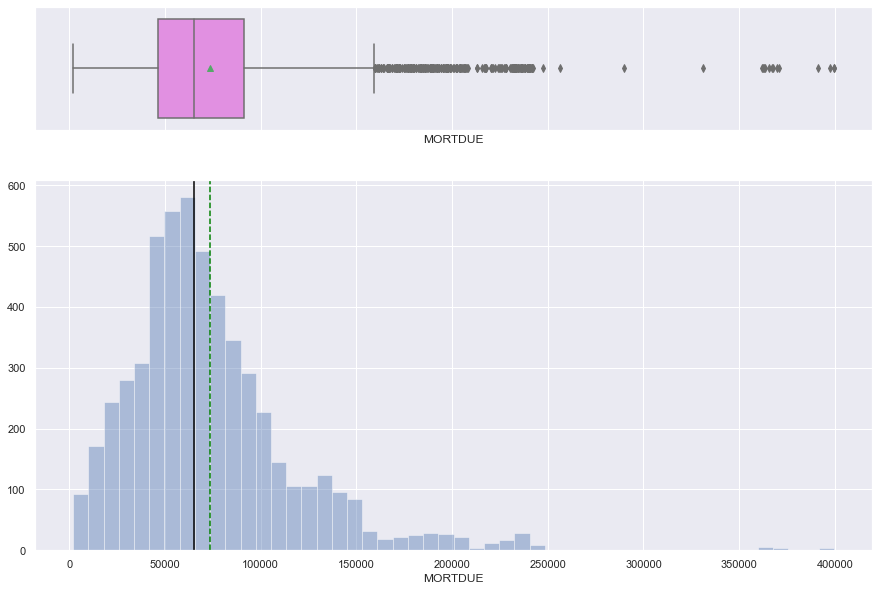



Histogram & Boxplot for VALUE
Skew : 3.05


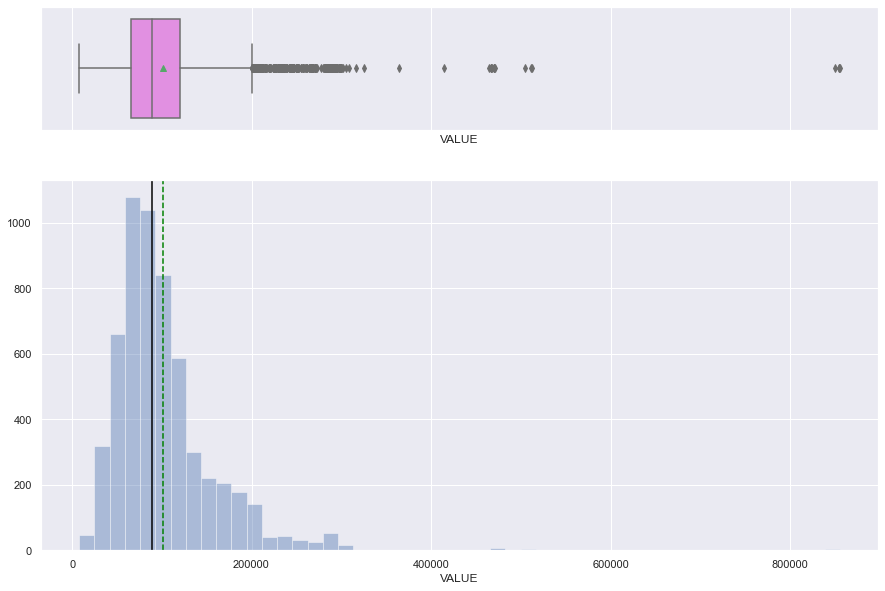



Histogram & Boxplot for YOJ
Skew : 0.99


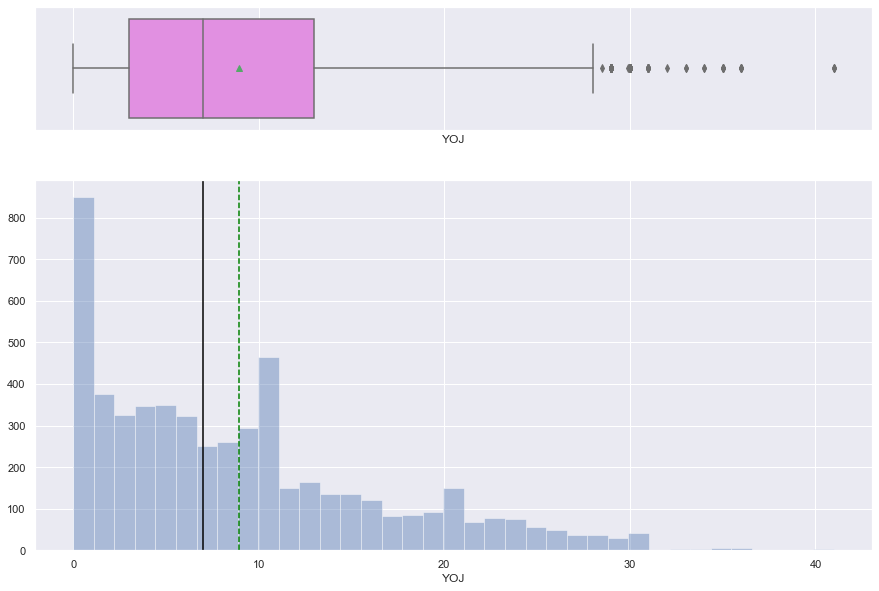



Histogram & Boxplot for DEROG
Skew : 5.32


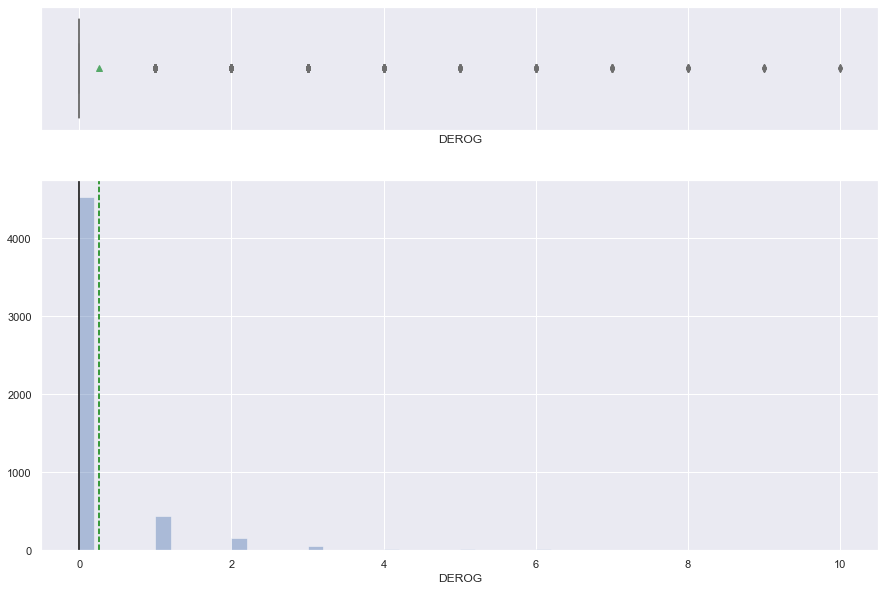



Histogram & Boxplot for DELINQ
Skew : 4.02


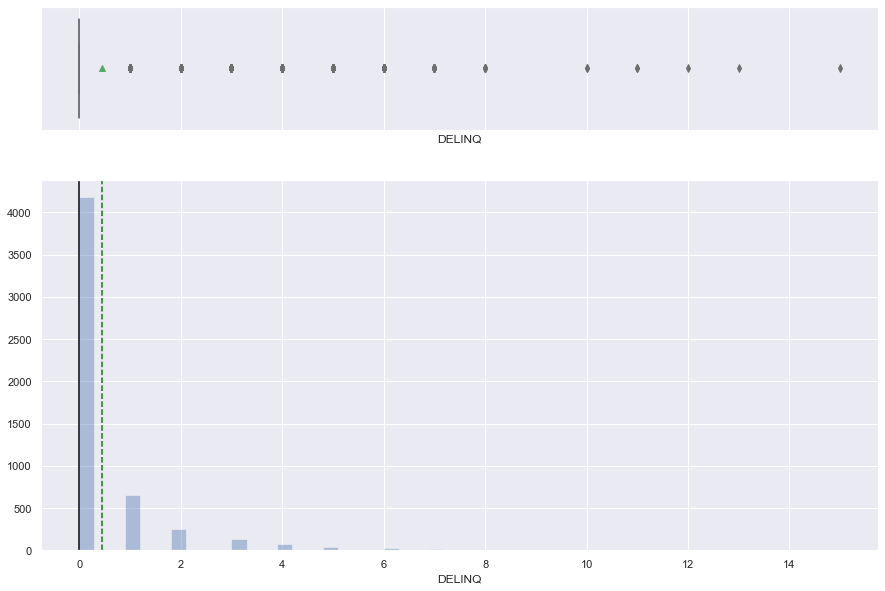



Histogram & Boxplot for CLAGE
Skew : 1.34


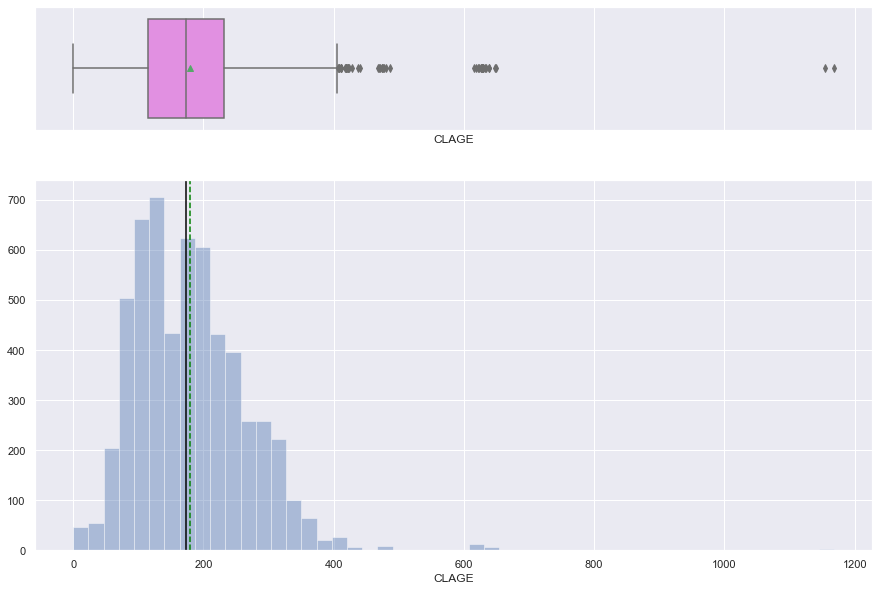



Histogram & Boxplot for NINQ
Skew : 2.62


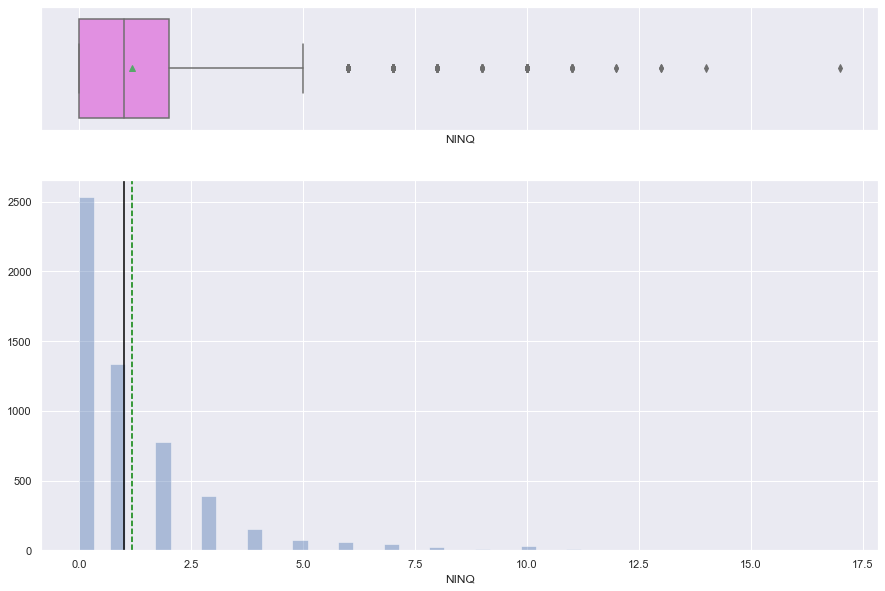



Histogram & Boxplot for CLNO
Skew : 0.78


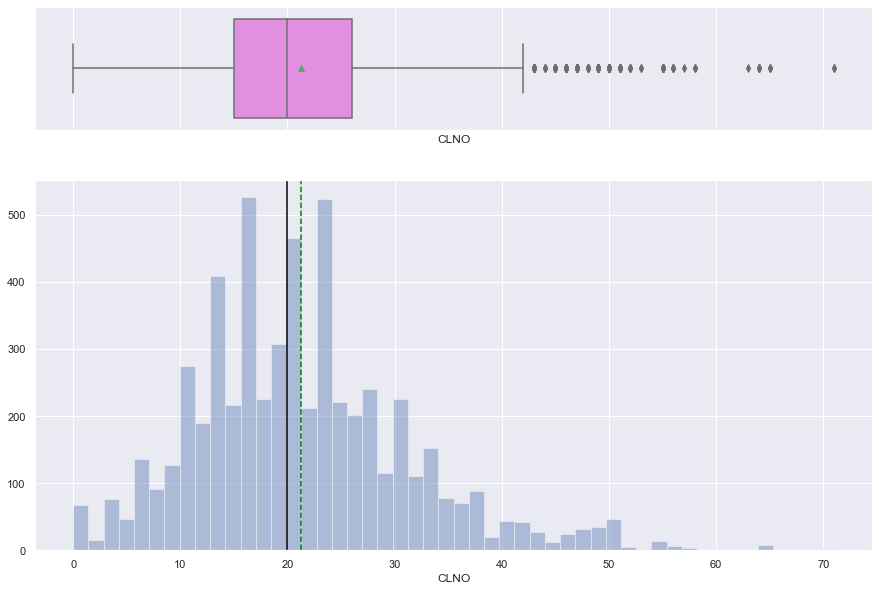



Histogram & Boxplot for DEBTINC
Skew : 2.85


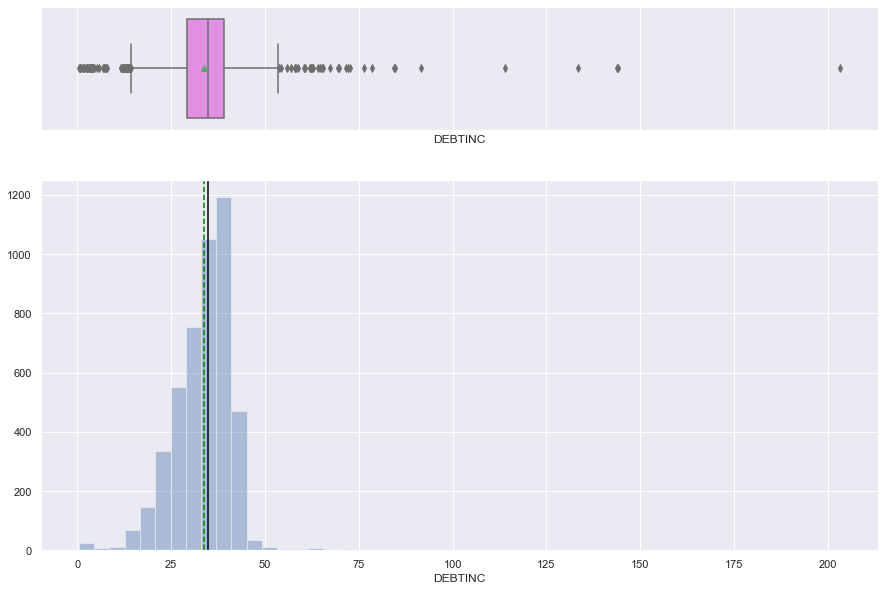

In [20]:
# Build the histogram boxplot for multiple numeric plots
for i in num_col:
    print('Histogram & Boxplot for',i)
    histogram_boxplot(data[i])
    print('\n')

**Insights**

`MORTDUE`
* The variable shows a right-skewness of 1.81.
* The distribution shows a significant number of mortgage dues valued at least 100K dollars. The variable is a good candidate to predict whether the user is going to default although there are a few outliers we will have take into account; this will require a test whether they are above 1.5 times of IQR range.

`VALUE`
* The variable shows the skewness at 3.05. This means some of the property values are significantly right-skewed.
* This is the point where we will have to decide whether to cut-off values that are above 1.5 times the IQR range. The plot clearly shows that there is a strong skewness and hence outliers.

`YOJ`
* The distribtuion is slightly right-skewed at 0.99. It seems that the distribution is close to normal despite the skewness.

`DEROG`, `DELINQ`, and `NINQ`
* These variables are strongly right-skewed at 5.32, 4.02, and 2.62 respectively. Because they are discrete variables with only whole numbers, we will need a better way to analyze them which will be done on separate Univariate Analysis.

`CLAGE`
* The variable shows a right-skewness of 1.34. It seems that max values are indeed outliers as they are beyond 1.5 times the IQR range by seeing the boxplot.

`CLNO`
* The variable is slgihtly right-skewed that 0.78. The distribution is the closest to the normal distribution that we generallt want to see.
* It seems that we do see a bit of outliers, but the variable has the most stable distribution out of all other variables.

`DEBTINC`
* The variable shows a strong right-skewness at 2.85.
* The max 234 Debt-to-Income Ratio seems to be an outlier that we want to exclude as it is hindering the construction of the model.
* If we remove outliers, we can potentailly establish the approximate normal distribution.


### **2. Univariate Analysis - Categorical Data**

In [21]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.2 # width of the plot
        y = p.get_y() + p.get_height()         # height of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percentage 
        
    plt.show() # show the plot

#### Analyze Barplot for DELINQ

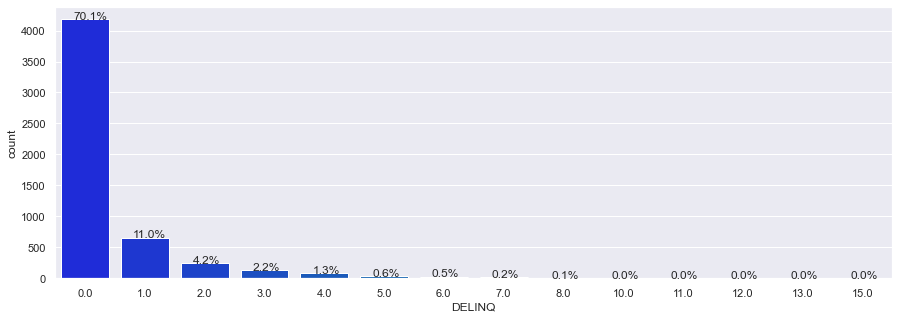

In [22]:
#Build barplot for DELINQ

plt.figure(figsize=(15,5))
ax = sns.countplot(data["DELINQ"],palette='winter')
perc_on_bar(ax,data["DELINQ"])

**Insights**
* Not surprisingly, `DELINQ` shows 70% of loan requestors with no delinquent credit lines. The proportion decreases signifcantly as more delinquent credit lines increase.
* Around 20% of loan requestors have at least one delinquent credit lines. It seems that this variable will be a good measurement to predict who will likely default.
* Note that `DELINQ` is not a categorical variable but a discrete numeric variable. I applied this variable to part of this univariate analysis for more efficient analysis.

#### **Note:** As done above, analyze Histogram and Boxplot for other variables.

**NINQ Barplot**

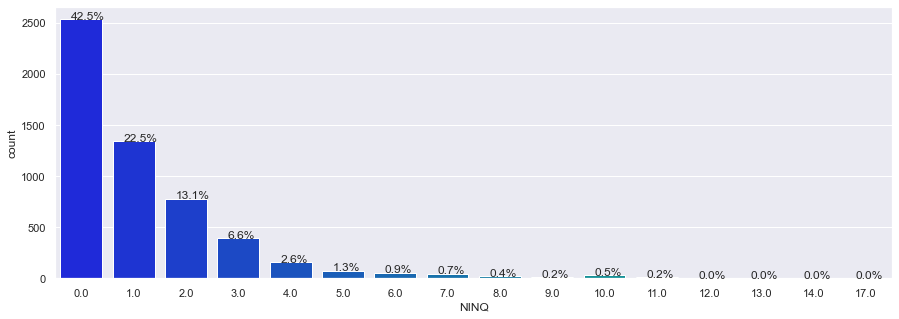

In [23]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["NINQ"],palette='winter')
perc_on_bar(ax,data["NINQ"])

**Insights**
* `NINQ` shows 42.5% of loan requestors with no recent credit inquiries, with 22.5% of 1 inquiry and 13.1% of 2 inquiries following after. That adds up to around 78% of people with 2 or less recent credit inquiries.
* Usually, more credit inquiries do not necessarily mean the higher chance of default, but it will be interesting to see loan requestors with more than 6 recent credit inquiries if they are on the risk of defaulting. That is around 2% of recorded loan requestors.
* Note that `NINQ` is not a categorical variable but a discrete numeric variable. I applied this variable to part of this univariate analysis for more efficient analysis.

**DEROG Barplot**

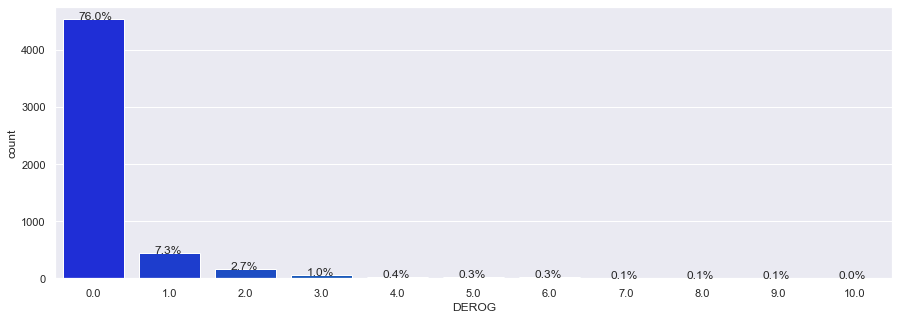

In [24]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["DEROG"],palette='winter')
perc_on_bar(ax,data["DEROG"])

**Insights**
* 76% of loan requestors had no derogatory reports. This also means 24% of loan requestors had at least one derogatory reports.
* Note that `DEROG` is not a categorical variable but a discrete numeric variable. I applied this variable to part of this univariate analysis for more efficient analysis.

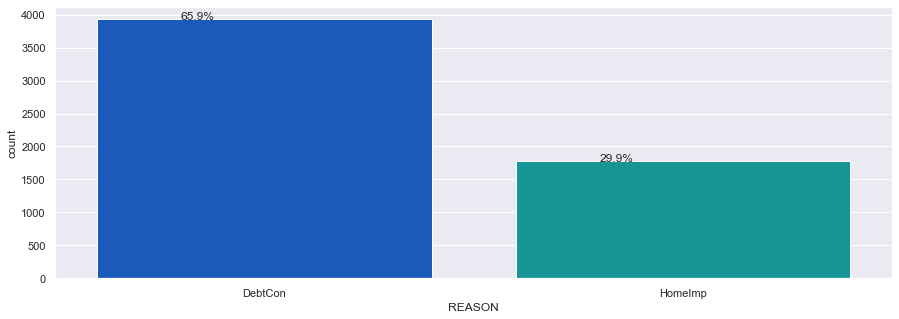

In [25]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["REASON"],palette='winter')
perc_on_bar(ax,data["REASON"])

**Insights**
* We observe that 66% of `REASON` for loan request came from Debt Consolidation.

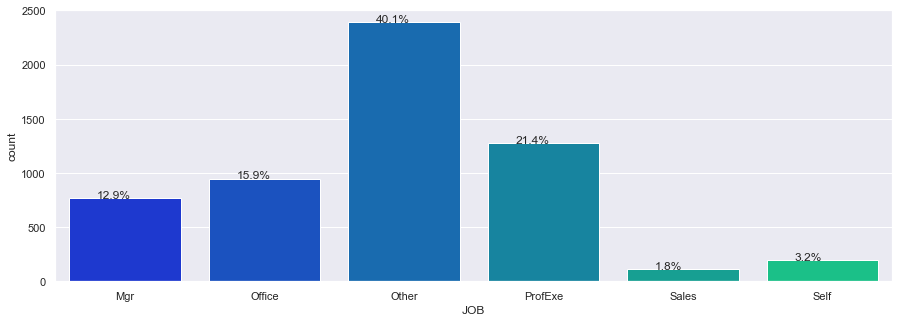

In [26]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["JOB"],palette='winter')
perc_on_bar(ax,data["JOB"])

**Insights**
* We observe that 40% of `JOB` came from Other. The second most job title was Professional Executive. It will be interesting to see what Other categories we are referring to if that job section had the most default rate.

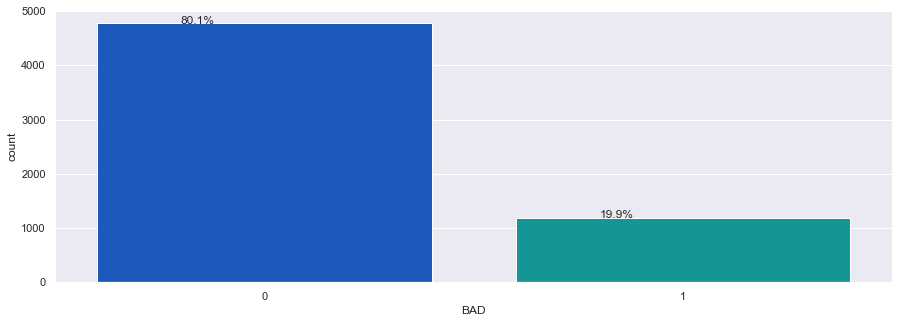

In [27]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["BAD"],palette='winter')
perc_on_bar(ax,data["BAD"])

**Insights**
* As we have observed earlier, we do see 80% successfully repaying their loans while 20% failed to do so.

## **Bivariate Analysis**

###**Bivariate Analysis: Continuous and Categorical Variables**

#### Analyze BAD vs Loan

<AxesSubplot:xlabel='BAD', ylabel='LOAN'>

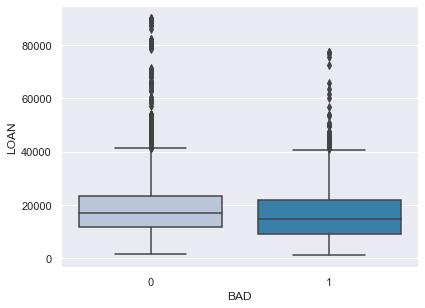

In [28]:
sns.boxplot(data["BAD"],data['LOAN'],palette="PuBu")

**Insights**
* It seems that the amount of loans borrowed by loan requestors were similar to the group who defaulted and the group who did not default.

**BAD vs MORTDUE**

<AxesSubplot:xlabel='BAD', ylabel='MORTDUE'>

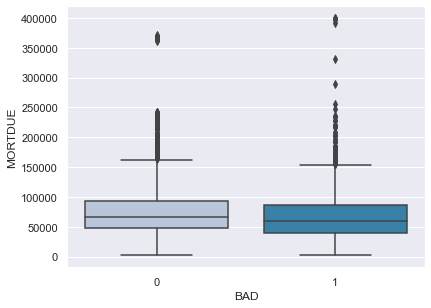

In [29]:
sns.boxplot(data["BAD"],data['MORTDUE'],palette="PuBu")

**Insights**
* `MORTDUE`, too, does not show a significant variance between the defaulted group and the non-defaulted group.

**BAD vs VALUE**

<AxesSubplot:xlabel='BAD', ylabel='VALUE'>

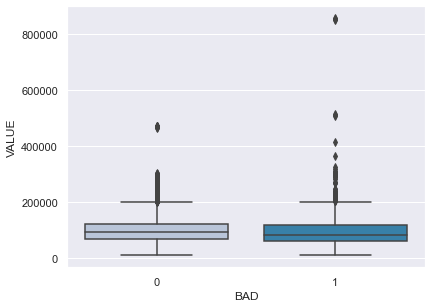

In [30]:
sns.boxplot(data["BAD"],data['VALUE'],palette="PuBu")

**Insights**
* `VALUE`, too, shows the similar range between the defaulted group and the non-defaulted group.

**BAD VS YOJ**

<AxesSubplot:xlabel='BAD', ylabel='YOJ'>

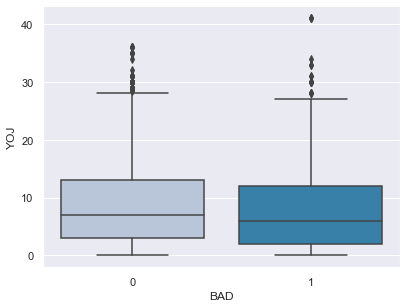

In [31]:
sns.boxplot(data["BAD"],data['YOJ'],palette="PuBu")

**Insights**
* It seems that the year in employment does not make a significant difference in the probability of defaulting on loans. However, There seems to exist a strong outlier for defaulted group.

**BAD VS CLAGE**

<AxesSubplot:xlabel='BAD', ylabel='CLAGE'>

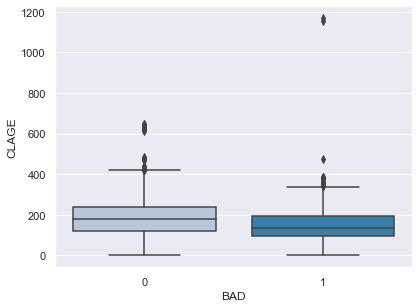

In [32]:
sns.boxplot(data["BAD"],data['CLAGE'],palette="PuBu")

In [33]:
data[['BAD','CLAGE']].groupby(['BAD']).mean()

CLAGE
BAD            
0    187.002355
1    150.190183

**Insights**
* The defaulted group seems to have much tighter proportion in terms of the age of the oldest credit lines compared to the non-defaulted group if we exclude outliers.
* Overall, it seems that higehr `CLAGE` on average leads to lower chance of defaulting.

**BAD vs CLNO**

<AxesSubplot:xlabel='BAD', ylabel='CLNO'>

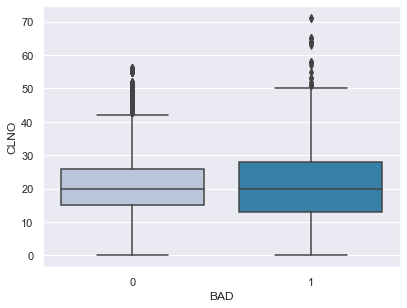

In [34]:
sns.boxplot(data["BAD"],data['CLNO'],palette="PuBu")

**Insights**
* We observe much wider range of `CLNO` when the loan requestor defaulted.

**BAD vs DEBTINC**

<AxesSubplot:xlabel='BAD', ylabel='DEBTINC'>

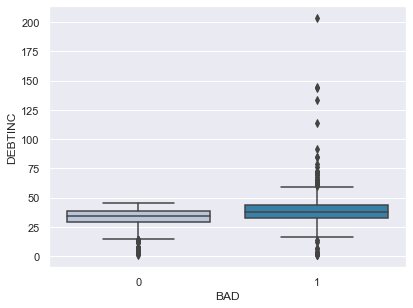

In [35]:
sns.boxplot(data["BAD"],data['DEBTINC'],palette="PuBu")

In [36]:
data[['BAD','DEBTINC']].groupby(['BAD']).mean()

DEBTINC
BAD           
0    33.253129
1    39.387645

**Insights**
* Not surprisingly, the defaulted group is much more diverse in terms of Debt-to-Income Ratio. On average, their Debt-to-Income Ratio is at around 35-40%.
* The non-defaulted group seems to be ranged within 50%, so they are showing much more stable Debt-to-Income ratio compared to the defaulted group.

REASON vs. LOAN


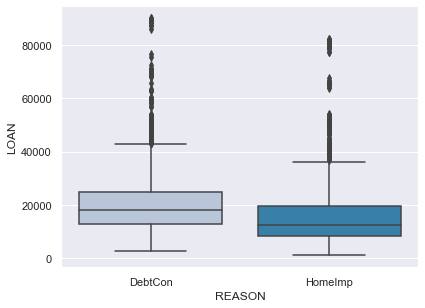

REASON vs. MORTDUE


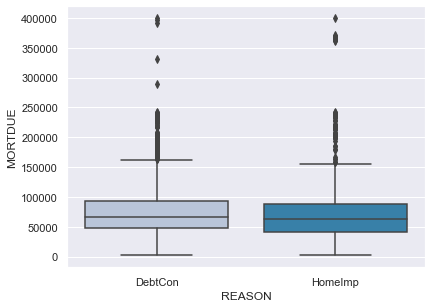

REASON vs. VALUE


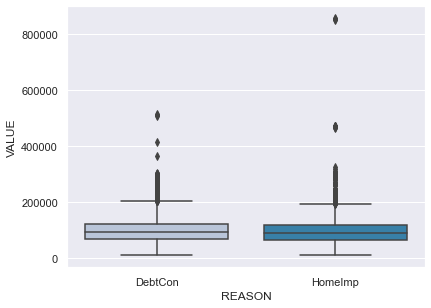

REASON vs. YOJ


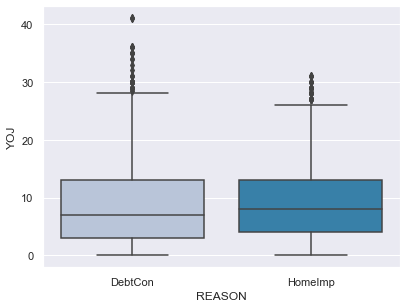

REASON vs. CLAGE


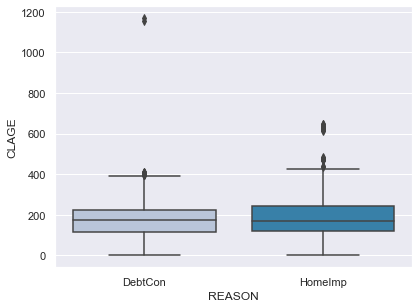

REASON vs. CLNO


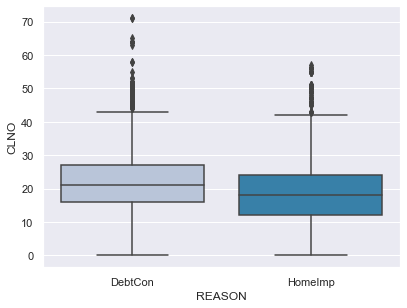

REASON vs. DEBTINC


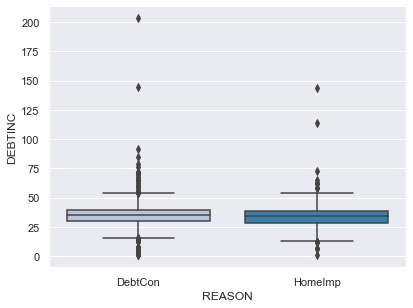

In [37]:
# Use loops for easier analysis with Categorical vs Continuous Variables
# Note: We excluded Discrete Variables
con_col = ['LOAN','MORTDUE','VALUE','YOJ','CLAGE','CLNO','DEBTINC']
for i in con_col:
    print("REASON vs.",i)
    sns.boxplot(data["REASON"],data[i],palette="PuBu")
    plt.show()

**Insights**
* `LOAN` shows slightly higher average loan approved for Debt Consolidation.
* `MORTDUE` and `VALUE` do not show significant difference for `REASON`.
* `YOJ` shows a wider disparity when the `REASON` equals to Debt Consolidation.
* `CLAGE` shows a significant outlier with Debt Consolidation.
* `CLNO` shows that the number of existing credit lines seems to exist more on loan requestors who requested loans for debt consolidation.
* `DEBATINC` shows much more diversified Debt-to-Income Ratio in Debt Consolidation compared to Home Improement. However, 230 DTI ratio seems to be an outlier on surface.

In [38]:
data[['REASON','LOAN']].groupby(['REASON']).mean()

LOAN
REASON               
DebtCon  19952.953157
HomeImp  16006.629213

JOB vs. LOAN


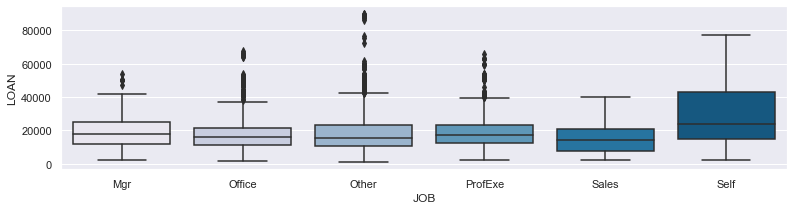

JOB vs. MORTDUE


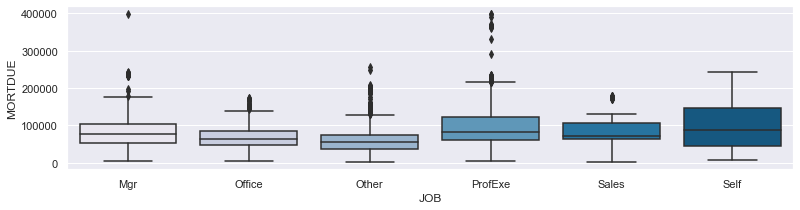

JOB vs. VALUE


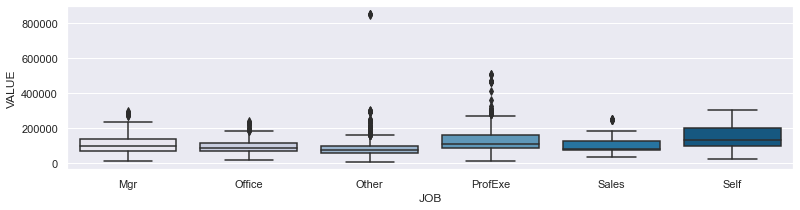

JOB vs. YOJ


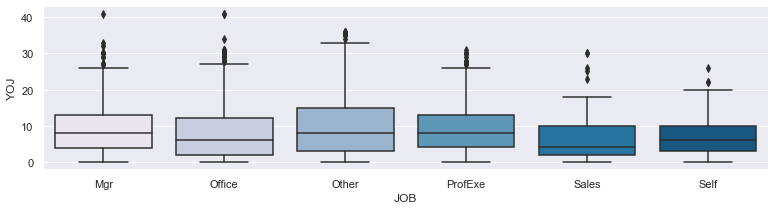

JOB vs. CLAGE


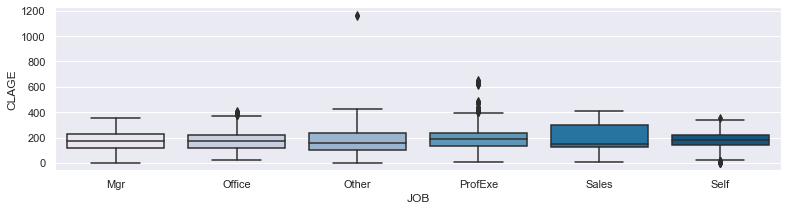

JOB vs. CLNO


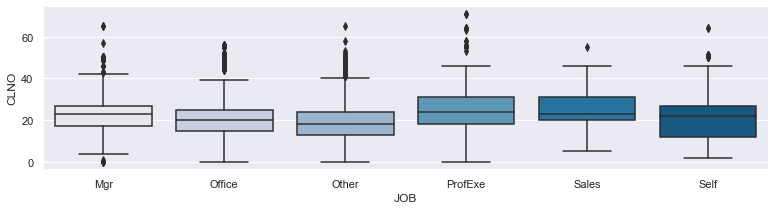

JOB vs. DEBTINC


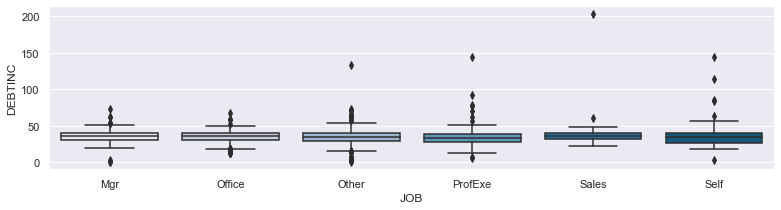

In [39]:
for i in con_col:
    plt.figure(figsize=(13,3))
    print("JOB vs.",i)
    sns.boxplot(data["JOB"],data[i],palette="PuBu")
    plt.show()

**Insights**
* `LOAN` is the greatest when the job title is self-employed.
* Both `MORTDUE` and `VALUE` show the highest average number for self-employed, with Professional Executive following after the first place.
* `YOJ` seems to be the strongest for both Other and Professional Executive.
* `CLAGE` shows the strongest average value at Sales.
* `CLNO` shows that the number of credit lines were strongest on Professional Executive and Sales. 
* `DEBATINC` Seems to be distributed similarly in terms of average across `JOB`.  However, we are seeing significant outliers on Sales, Professional Executive, and Self.

DEROG vs. LOAN


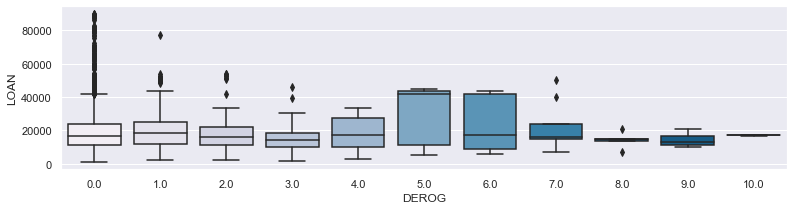

DEROG vs. MORTDUE


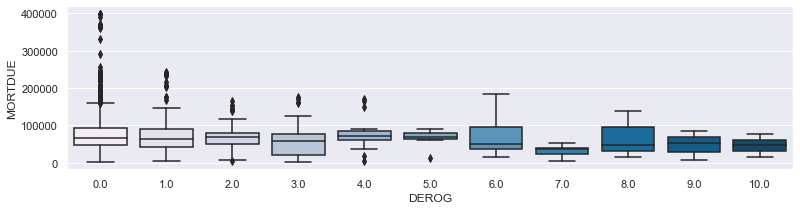

DEROG vs. VALUE


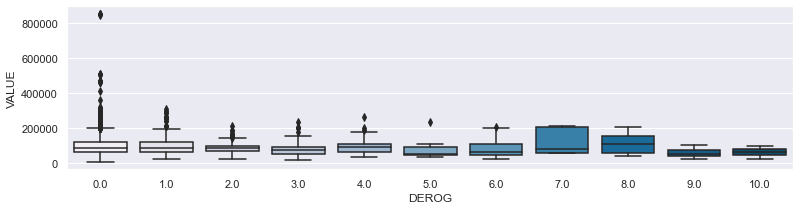

DEROG vs. YOJ


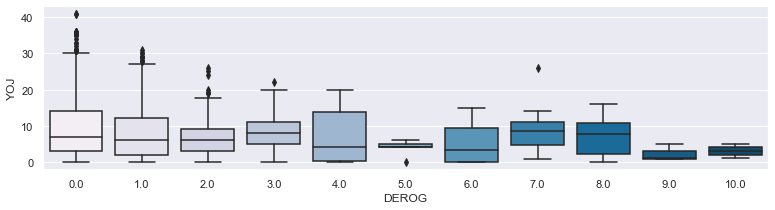

DEROG vs. CLAGE


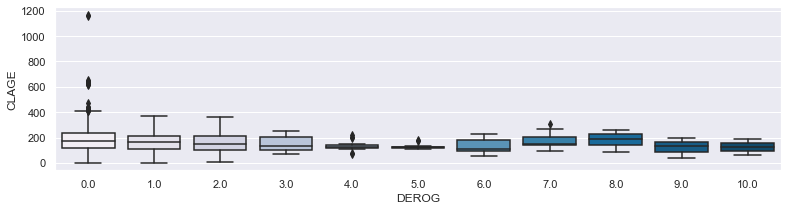

DEROG vs. CLNO


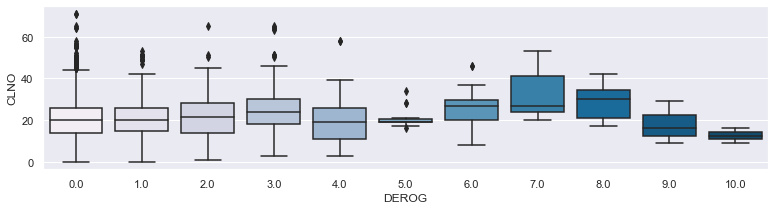

DEROG vs. DEBTINC


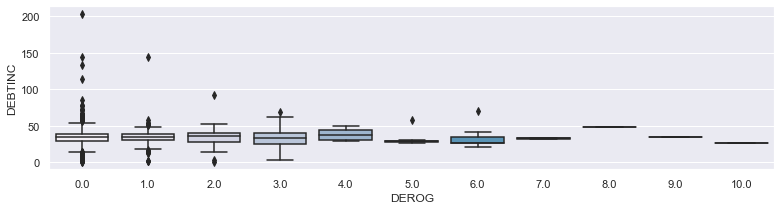

In [40]:
for i in con_col:
    plt.figure(figsize=(13,3))
    print("DEROG vs.",i)
    sns.boxplot(data["DEROG"],data[i],palette="PuBu")
    plt.show()

**Insights**
* `LOAN` seems to be more prominent under 5 and 6 `DEROG`, with a large IQR compared to other number of derogatory reports.
* The average `MORTDUE` was at around 80K dollars regardless of `DEROG`.
* Average `VALUE`, too, showed no difference in terms of `DEROG`. However, IQR seemed to be large at 7 derogatory reports.
* `YOJ` seems to have averaged within 10 years in job for all derogatory reports. This means a majority of loan requestors has not been in the employment for at least 10 years when they requested the loan.
* The average `CLAGE` seems to be bounded around 200 months regardless of derogatory reports.
* `CLNO` seems to be the greatest when the number of derogatory reports was at 7 or 8. Most of the time, the number of existing credit lines averaged at around 20.
* Because we did see substantial number of NULL values, `DEBTINC` is showing tight boxplots starting 5 derogatory reports. Overall, DTI ratio seems to be similar depending on the number of derogatory reports.

DELINQ vs. LOAN


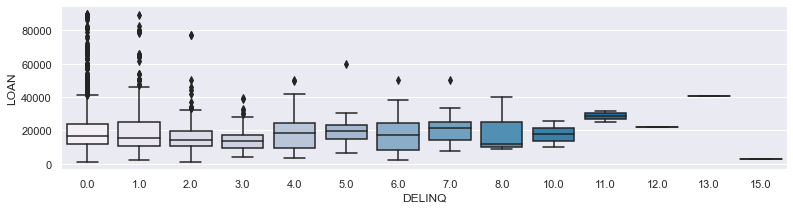

DELINQ vs. MORTDUE


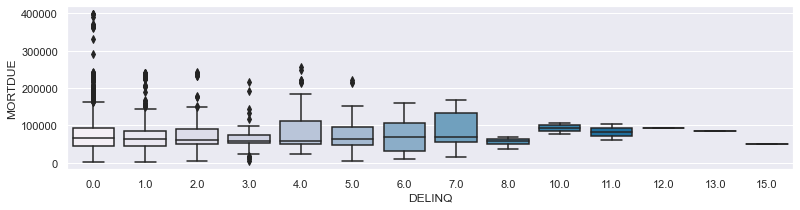

DELINQ vs. VALUE


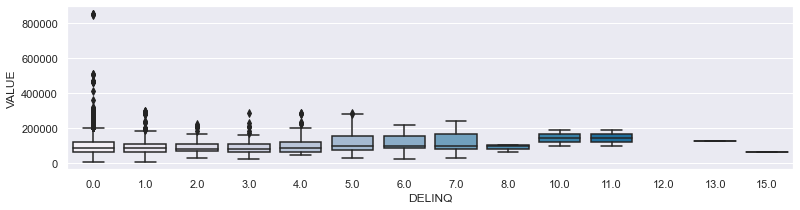

DELINQ vs. YOJ


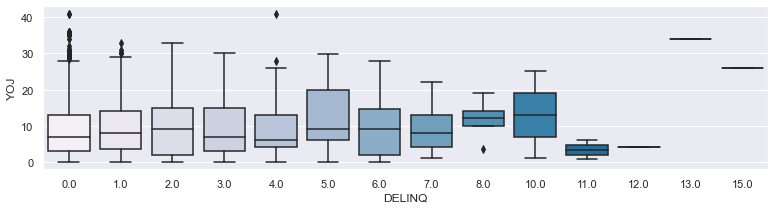

DELINQ vs. CLAGE


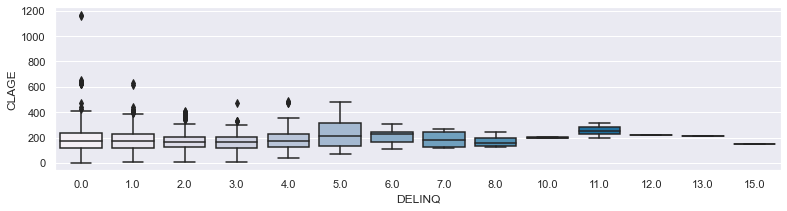

DELINQ vs. CLNO


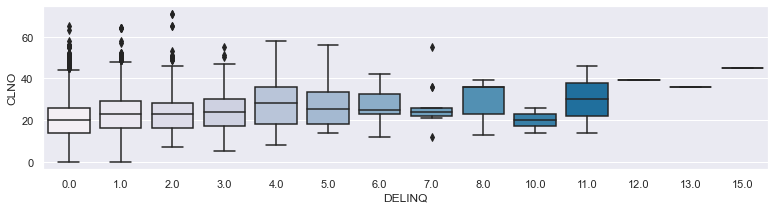

DELINQ vs. DEBTINC


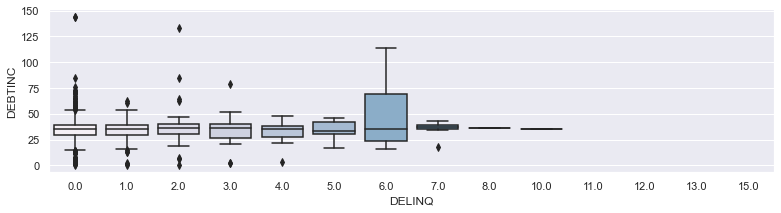

In [41]:
for i in con_col:
    plt.figure(figsize=(13,3))
    print("DELINQ vs.",i)
    sns.boxplot(data["DELINQ"],data[i],palette="PuBu")
    plt.show()

**Insights**
* It seems that it will be a good idea to exclude `DELINQ` starting 12 delinquent credit lines; we lack the data to properly analyze the difference by `DELINQ`.
* `LOAN` shows some higher amount of loan approved when there is no delinquency. The range starts to decline as the number of delinquent credit lines increases.
* `MORTDUE` and `VALUE` seem to be consistent regardless of `DELINQ`.
* The average `YOJ` seems to range around 5-10 years regardless of the `DELINQ`.
* `CLAGE` seems to maintain the mean at around 200 months for the oldest credit lines for each deliquency.
* `CLNO` seems to be higher as the number of delinquent credit lines increases. Interestingly, 10 delinquent credit lines seem to be unusually low. Nevertheless, there is a chance that this will disappear when we take care of the outliers.

### **Bivariate Analysis: Two Continuous Variables**

<AxesSubplot:xlabel='VALUE', ylabel='MORTDUE'>

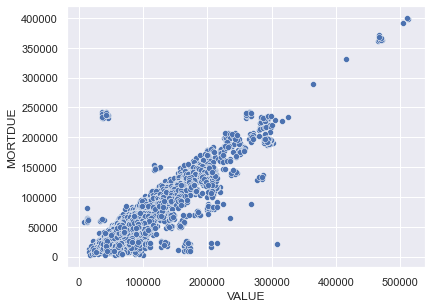

In [42]:
sns.scatterplot(data["VALUE"],data['MORTDUE'],palette="PuBu")

**Insights:**
* Approximately, there exists a linear relationship between `MORTDUE` and `VALUE`.

#### **Note:** As shown above, perform Bivariate Analysis on different pairs of continuous variables

<AxesSubplot:xlabel='VALUE', ylabel='LOAN'>

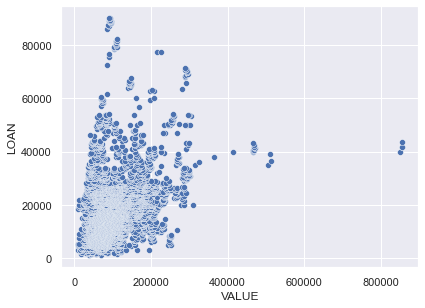

In [43]:
sns.scatterplot(data["VALUE"],data['LOAN'],palette="PuBu")

**Insights**
* We are observing no relationship between `LOAN` and `VALUE`. compared to above, the relationship is not linear.

<AxesSubplot:xlabel='VALUE', ylabel='YOJ'>

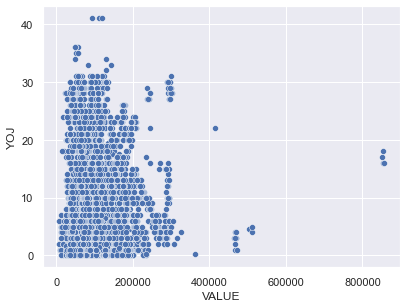

In [44]:
sns.scatterplot(data["VALUE"],data['YOJ'],palette="PuBu")

**Insights**
* `VALUE` and `YOJ` also shows no linear relationship between the two variables.
* We tried logarithmic approach on `VALUE`, but that did not show a relationship between the two variables.

<AxesSubplot:xlabel='VALUE', ylabel='CLAGE'>

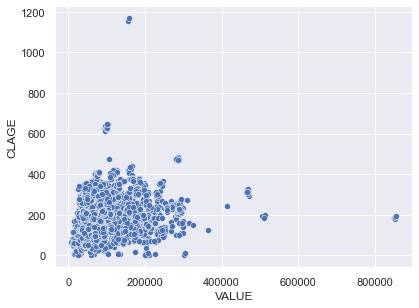

In [45]:
sns.scatterplot(data["VALUE"],data['CLAGE'],palette="PuBu")

**Insights**
* `VALUE` and `CLAGE`, too, does not show explicit linear relationship between the two variables.

<AxesSubplot:xlabel='VALUE', ylabel='CLNO'>

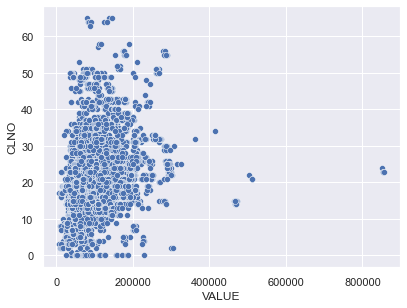

In [46]:
sns.scatterplot(data["VALUE"],data['CLNO'],palette="PuBu")

**Insights**
* This, too, does not show a significant relationship between the two variables.

<AxesSubplot:xlabel='VALUE', ylabel='DEBTINC'>

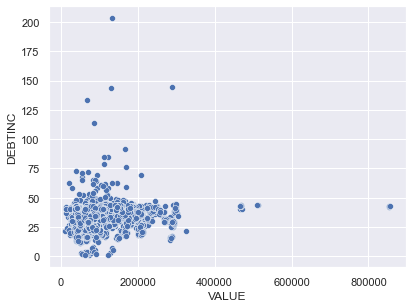

In [47]:
sns.scatterplot(data["VALUE"],data['DEBTINC'],palette="PuBu")

**Insights**
* `VALUE` and `DEBTINC` do not show any linear relationship between the two variables.

<AxesSubplot:xlabel='MORTDUE', ylabel='LOAN'>

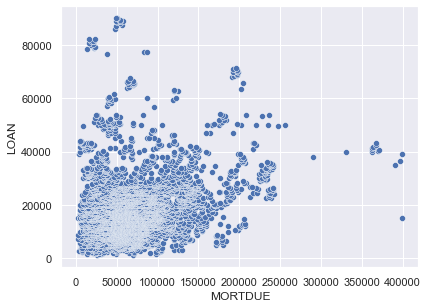

In [48]:
sns.scatterplot(data["MORTDUE"],data['LOAN'],palette="PuBu")

**Insights**
* `MORTDUE` and `LOAN` seems to not show a relationship between the two independent variables.

<AxesSubplot:xlabel='MORTDUE', ylabel='YOJ'>

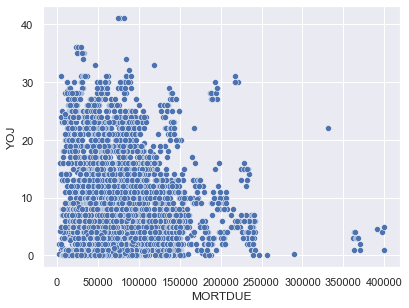

In [49]:
sns.scatterplot(data["MORTDUE"],data['YOJ'],palette="PuBu")

**Insights**
    * `YOJ` and `MORTDUE` is not showing a noticeable relationship between the two variables.

<AxesSubplot:xlabel='MORTDUE', ylabel='CLAGE'>

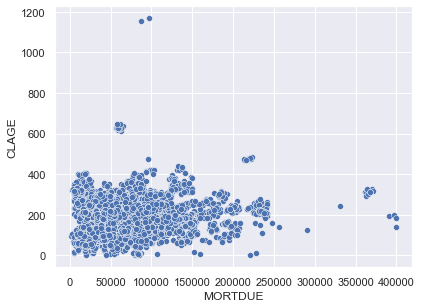

In [50]:
sns.scatterplot(data["MORTDUE"],data['CLAGE'],palette="PuBu")

**Insights**
* `CLAGE` and `MORTDUE` seem to show linear relationship but is very weak.

<AxesSubplot:xlabel='MORTDUE', ylabel='CLNO'>

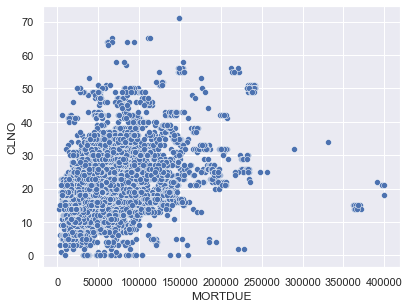

In [51]:
sns.scatterplot(data["MORTDUE"],data['CLNO'],palette="PuBu")

**Insights**
* `CLNO` and `MORTDUE` do not show prominent relationship.

<AxesSubplot:xlabel='MORTDUE', ylabel='DEBTINC'>

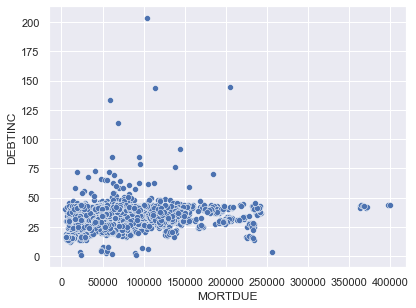

In [52]:
sns.scatterplot(data["MORTDUE"],data['DEBTINC'],palette="PuBu")

**Insights **
* `MORTDUE` and `DEBTINC` seem to show a linear relationship but the slope is close to 0.

<AxesSubplot:xlabel='LOAN', ylabel='YOJ'>

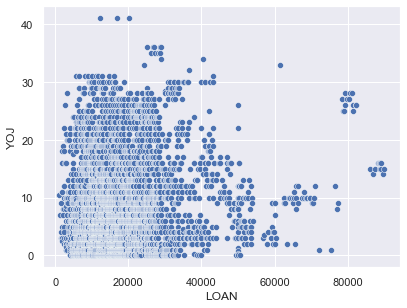

In [53]:
sns.scatterplot(data["LOAN"],data['YOJ'],palette="PuBu")

**Insights**
* `YOJ` and `LOAN` do not show any linear relationship.

<AxesSubplot:xlabel='LOAN', ylabel='CLAGE'>

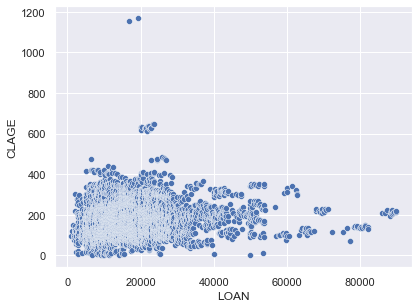

In [54]:
sns.scatterplot(data["LOAN"],data['CLAGE'],palette="PuBu")

**Insights**
`CLAGE` and `LOAN` do not show a noticeable linear relationship.

<AxesSubplot:xlabel='LOAN', ylabel='CLNO'>

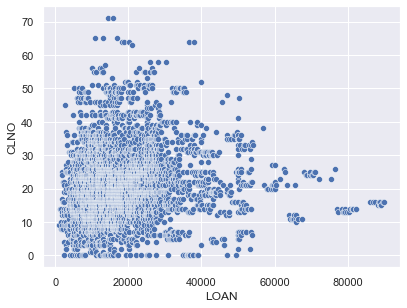

In [55]:
sns.scatterplot(data["LOAN"],data['CLNO'],palette="PuBu")

**Insights**
* `LOAN` and `CLNO` do not show a linear relationship.

<AxesSubplot:xlabel='LOAN', ylabel='DEBTINC'>

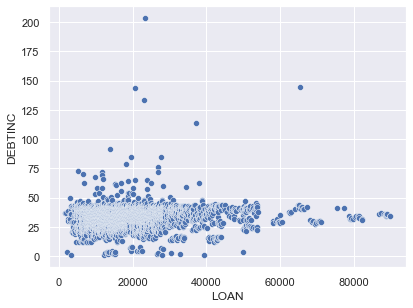

In [56]:
sns.scatterplot(data["LOAN"],data['DEBTINC'],palette="PuBu")

**Insights**
* `DEBTINC` and `LOAN` seem to show a linear relationship but is flat, with slope close to 0.

<AxesSubplot:xlabel='YOJ', ylabel='CLAGE'>

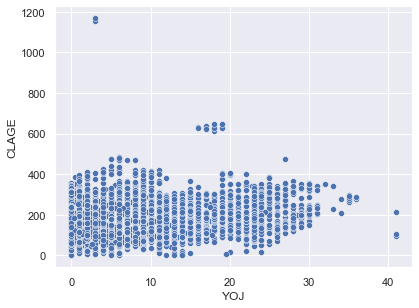

In [57]:
sns.scatterplot(data["YOJ"],data['CLAGE'],palette="PuBu")

**Insights**
* `YOJ` and `CLAGE` seem to show a linear relationship but is flat, with slope close to 0.

<AxesSubplot:xlabel='YOJ', ylabel='CLNO'>

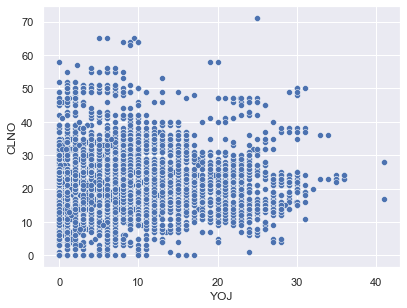

In [58]:
sns.scatterplot(data["YOJ"],data['CLNO'],palette="PuBu")

**Insights**
* `YOJ` and `CLNO` do not show a noticeable linear relationship.

<AxesSubplot:xlabel='YOJ', ylabel='DEBTINC'>

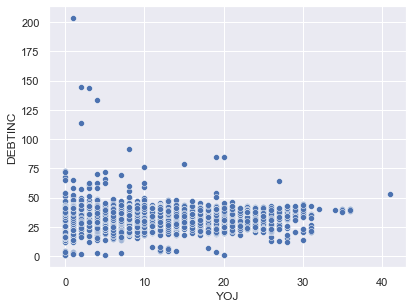

In [59]:
sns.scatterplot(data["YOJ"],data['DEBTINC'],palette="PuBu")

**Insights**
* `YOJ` and `DEBTINC` seem to show a linear relationship but is flat, with slope close to 0.

<AxesSubplot:xlabel='CLAGE', ylabel='CLNO'>

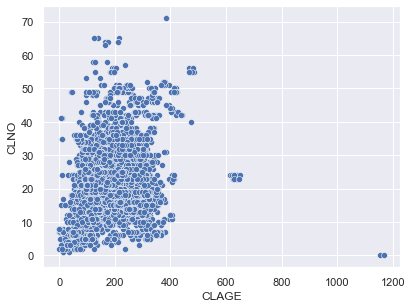

In [60]:
sns.scatterplot(data["CLAGE"],data['CLNO'])

**Insights**
* `CLAGE` and `CLNO` do not show a noticeable linear relationship.

<AxesSubplot:xlabel='CLAGE', ylabel='DEBTINC'>

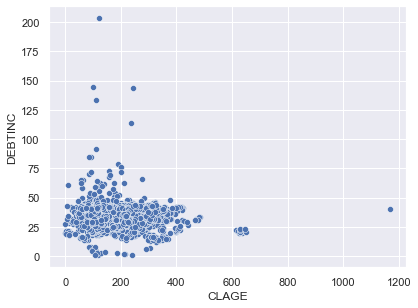

In [61]:
sns.scatterplot(data["CLAGE"],data['DEBTINC'],palette="PuBu")

**Insights**
* `DEBTINC` and `CLAGE` do not show a noticeable linear relationship.

<AxesSubplot:xlabel='CLNO', ylabel='DEBTINC'>

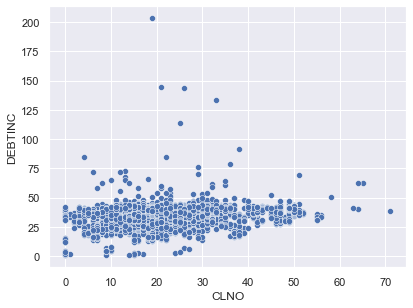

In [62]:
sns.scatterplot(data["CLNO"],data['DEBTINC'],palette="PuBu")

**Insights**
* `CLNO` and `DEBTINC` seem to show a linear relationship but is flat, with slope close to 0.

### **Bivariate Analysis:  BAD vs Categorical Variables**

**The stacked bar chart (aka stacked bar graph)** extends the standard bar chart from looking at numeric values across one categorical variable to two.

In [63]:
### Function to plot stacked bar charts for categorical columns

def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['BAD'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data['BAD'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

#### Plot stacked bar plot for for BAD and REASON

BAD         0     1   All
REASON                   
DebtCon  3183   745  3928
HomeImp  1384   396  1780
All      4567  1141  5708
------------------------------------------------------------------------------------------------------------------------


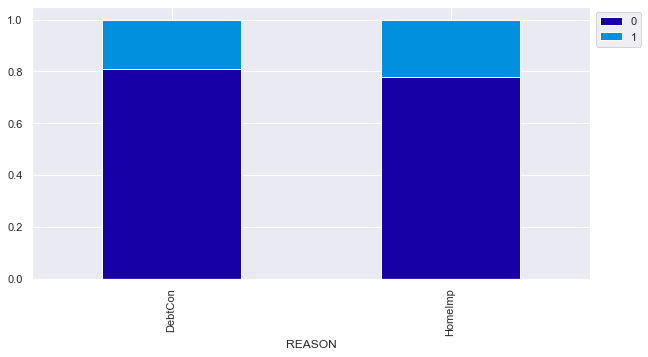

In [64]:
# Plot stacked bar plot for BAD and REASON
stacked_plot(data['REASON'])

**Insights**
* It seems that regardless of `REASON`, the probability of defaulting on home loans are similar for both groups.

#### **Note:** As shown above, perform Bivariate Analysis on different pairs of Categorical vs BAD

#### Plot stacked bar plot for for BAD and JOB

BAD         0     1   All
JOB                      
Mgr       588   179   767
Office    823   125   948
Other    1834   554  2388
ProfExe  1064   212  1276
Sales      71    38   109
Self      135    58   193
All      4515  1166  5681
------------------------------------------------------------------------------------------------------------------------


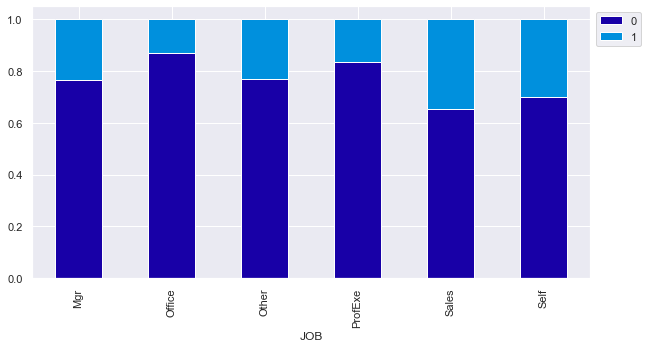

In [65]:
stacked_plot(data['JOB'])

**Insights**
* Interestingly, groups who are under Sales and Self-employed `JOB` have the highest probability of defaulting.
* Office workers had the least chance of defaulting.

BAD       0     1   All
DEROG                  
0.0    3773   754  4527
1.0     266   169   435
2.0      78    82   160
3.0      15    43    58
4.0       5    18    23
5.0       8     7    15
6.0       5    10    15
7.0       0     8     8
8.0       0     6     6
9.0       0     3     3
10.0      0     2     2
All    4150  1102  5252
------------------------------------------------------------------------------------------------------------------------


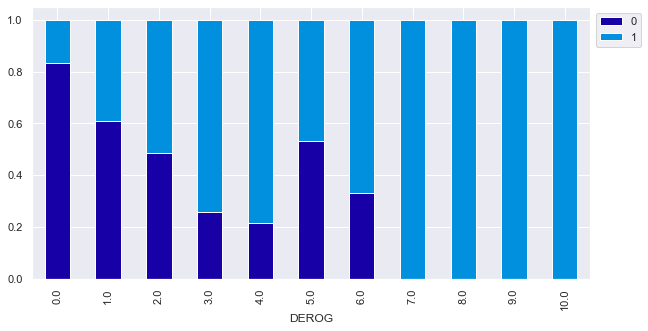

In [66]:
stacked_plot(data['DEROG'])

**Insights**
* The chance of defaulting seems to increase prominently as the number of derogatory reports increases.
* Interestingly, 20% of loan requestors who never had a derogatory report has failed to pay the loan.
* It seems that the probability of the default seems to decrease when the derogatory report is at 5 or 6.

BAD        0     1   All
DELINQ                  
0.0     3596   583  4179
1.0      432   222   654
2.0      138   112   250
3.0       58    71   129
4.0       32    46    78
5.0        7    31    38
6.0        0    27    27
7.0        0    13    13
8.0        0     5     5
10.0       0     2     2
11.0       0     2     2
12.0       0     1     1
13.0       0     1     1
15.0       0     1     1
All     4263  1117  5380
------------------------------------------------------------------------------------------------------------------------


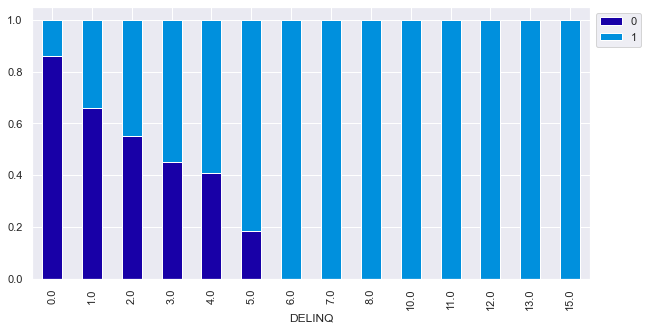

In [67]:
stacked_plot(data['DELINQ'])

**Insights**
* Not surprisingly, the probability of defaulting increases as the number of delinquent credit lines adds into the loan requestor's report.
* This seems to follow the common idea of the relationship between `DELINQ` and `BAD`.

BAD      0     1   All
NINQ                  
0.0   2135   396  2531
1.0   1085   254  1339
2.0    599   181   780
3.0    285   107   392
4.0     95    61   156
5.0     39    36    75
6.0     27    29    56
7.0     29    15    44
8.0     11    11    22
9.0      5     6    11
10.0    19     9    28
11.0     7     3    10
12.0     0     2     2
13.0     0     2     2
14.0     0     1     1
17.0     0     1     1
All   4336  1114  5450
------------------------------------------------------------------------------------------------------------------------


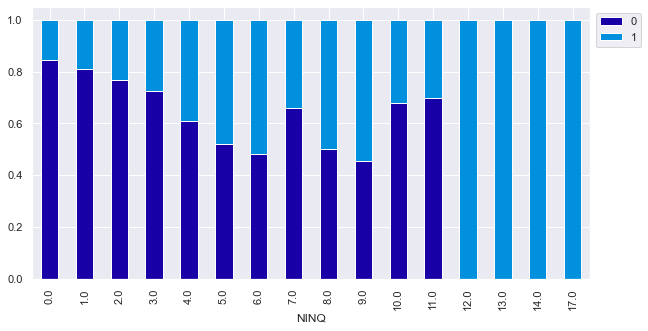

In [68]:
stacked_plot(data['NINQ'])

**Insights**
* We see a trend of defaults increasing as we see more `NINQ`, or recent credit inquiries. While there exists a few outlier at 7, 10, and 11 inquiries, the overall trend follows the fact that more recent credit inquiries mean that we can be suspicious of applicants' chance of defaulting in the future.

#### Analyze Correlation Heatmap for Numerical Variables

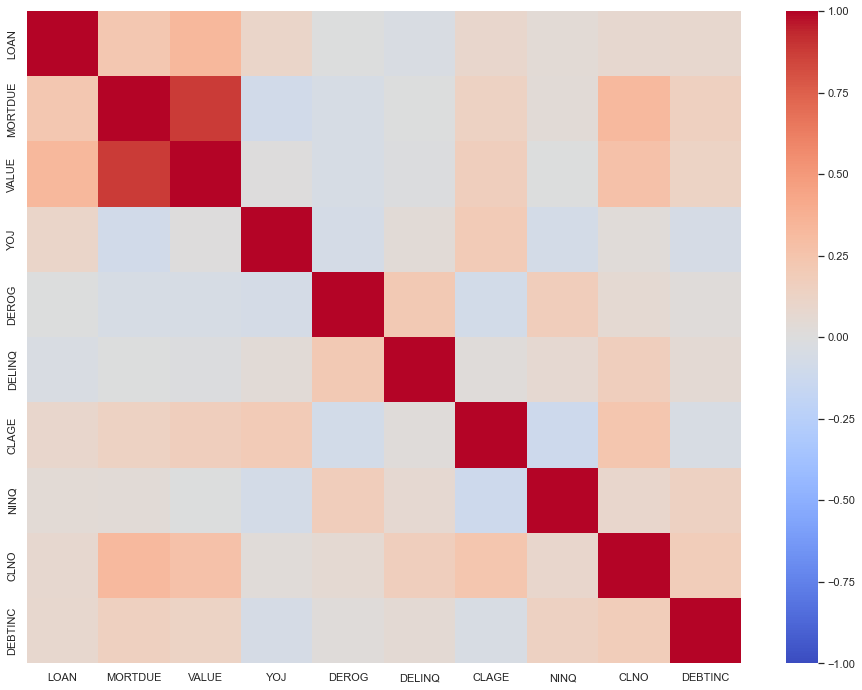

In [69]:
# Separating numerical variables
numerical_col = data.select_dtypes(include=np.number).columns.tolist()

# Build correlation matrix for numerical columns

corr = data[numerical_col].corr()

# plot the heatmap

plt.figure(figsize=(16,12))
sns.heatmap(corr,cmap='coolwarm',vmax=1,vmin=-1,
        fmt=".2f",
        xticklabels=corr.columns,
        yticklabels=corr.columns);

**Insight**
* `MORTDUE`-`VALUE` and `LOAN`-`VALUE` are showing a strong positive linear relationship between the two indepdent variables.
* `CLNO`-`MORTDUE` also show a strong positive linear relationship.
* The rest of independent variables shows weak postive and negative linear relationship.

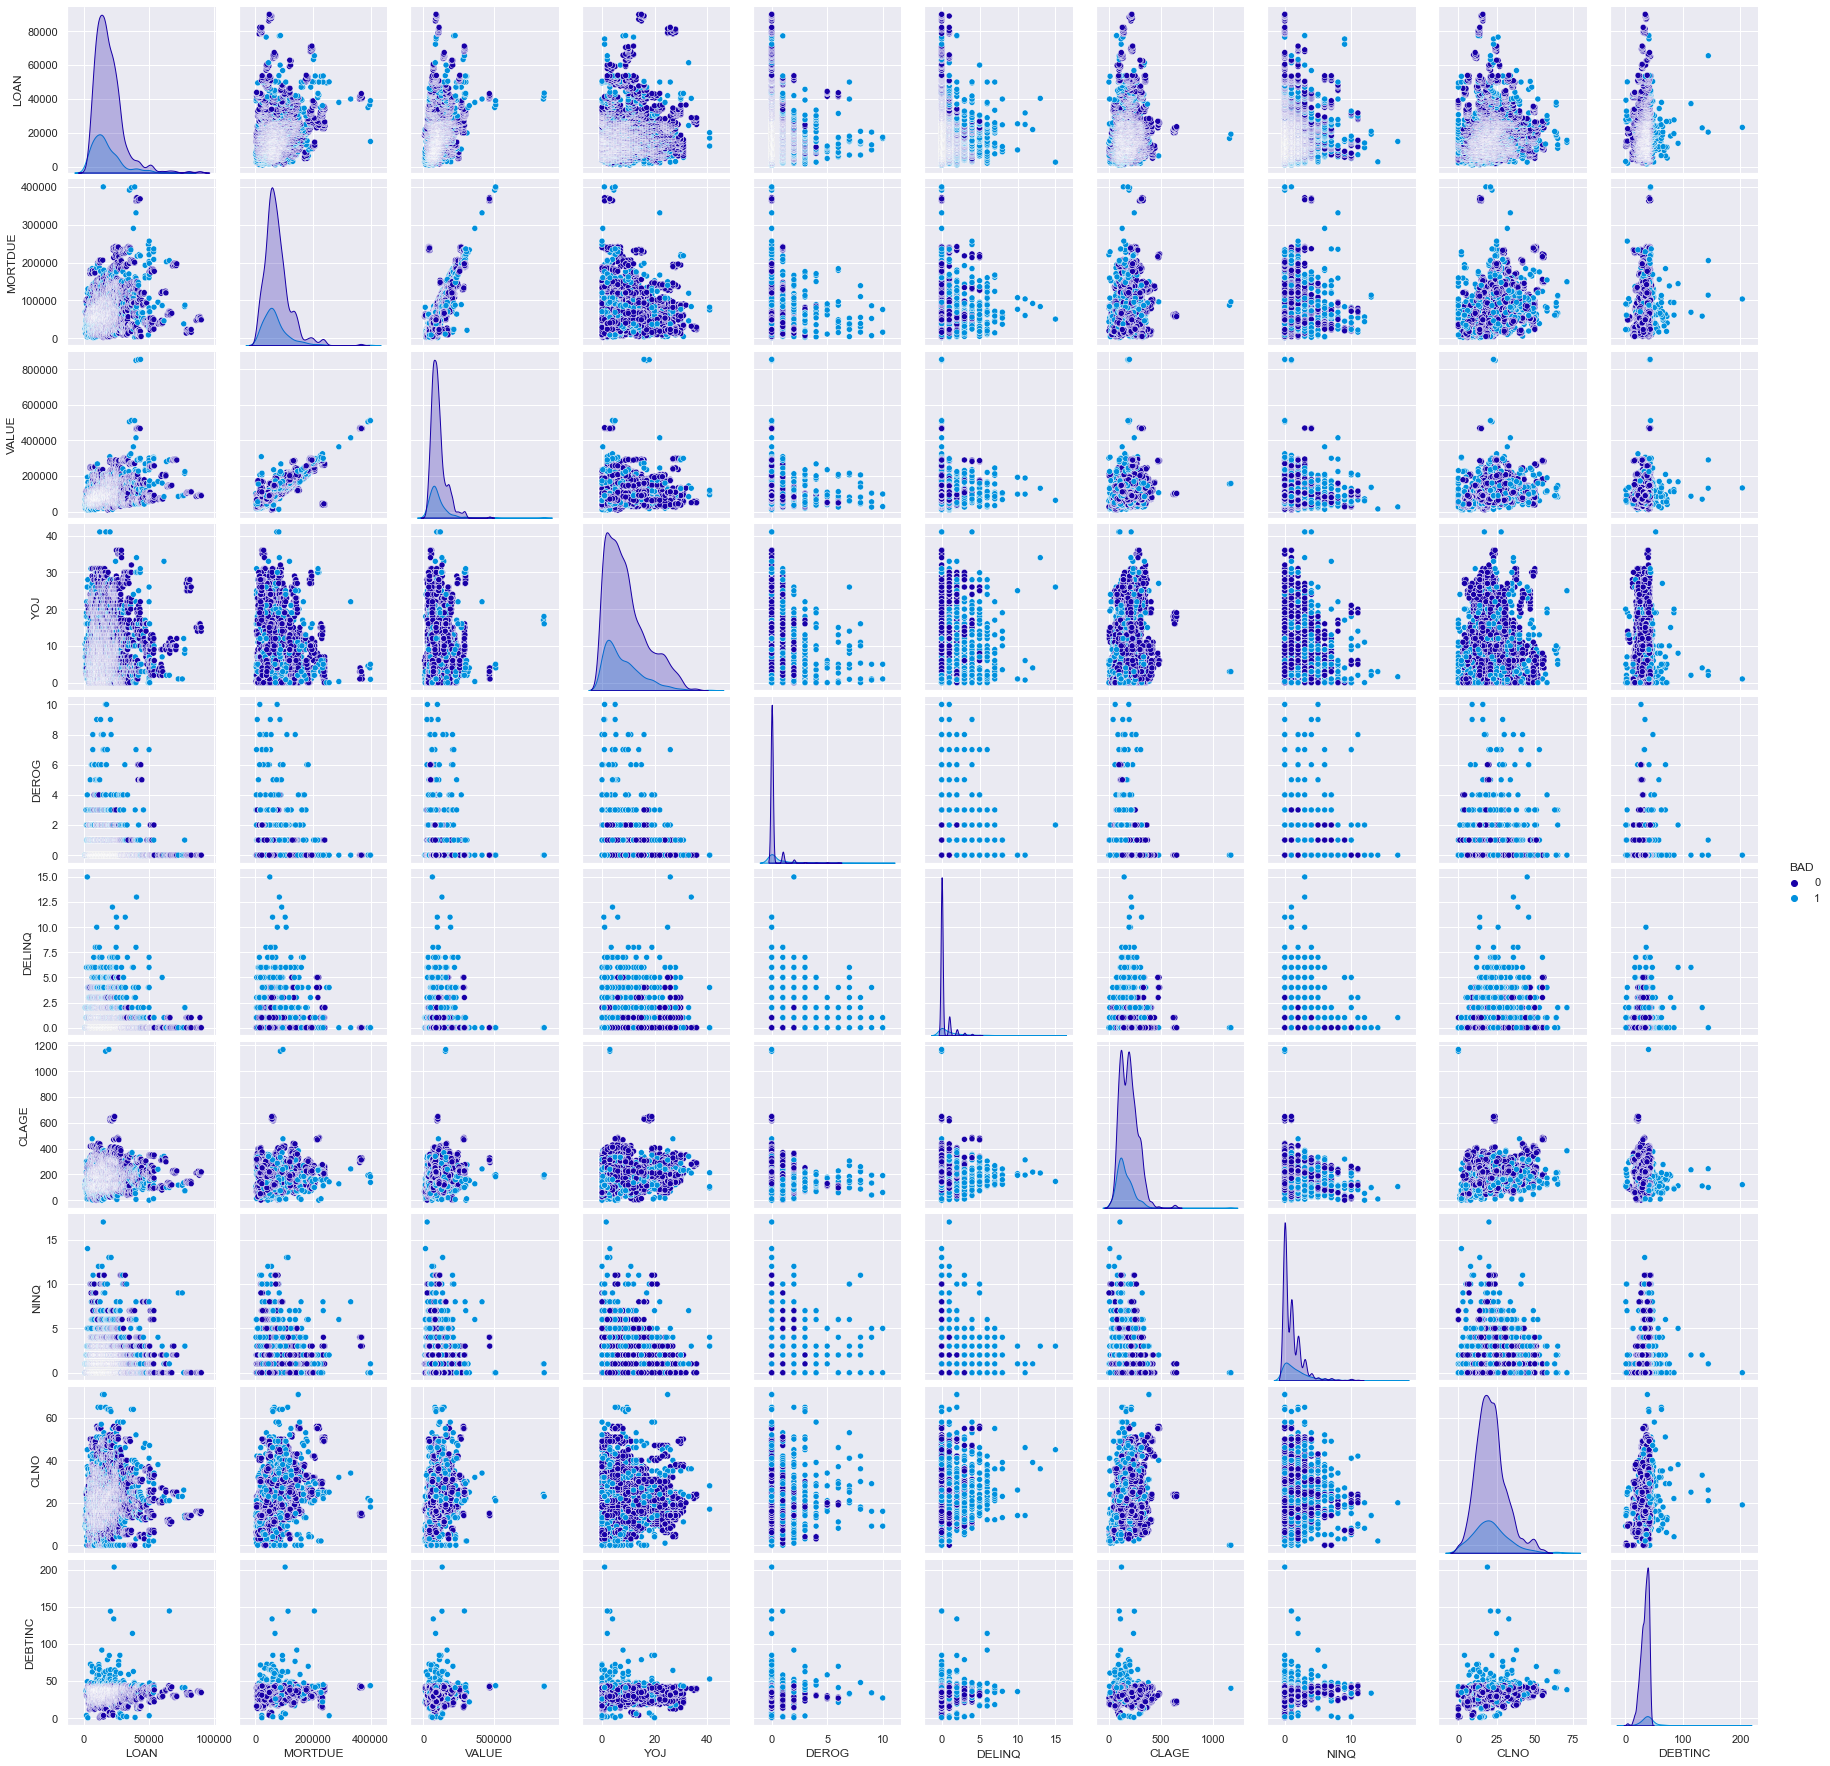

In [70]:
# Build pairplot for the data with hue = 'BAD'

sns.pairplot(data,hue = 'BAD')

### **Think about it**
- Are there missing values and outliers in the dataset? If yes, how can you treat them? 
- Can you think of different ways in which this can be done and when to treat these outliers or not?
- Can we create new features based on Missing values?

#### Treating Outliers

In [81]:
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical variable
    df: data frame
    col: name of the column
    '''
    
    Q1= df[col].quantile(0.25) # 25th quantile
    Q3= df[col].quantile(0.75)  # 75th quantile
    IQR= Q3 - Q1   # IQR Range
    Lower_Whisker = Q1 - 1.5 * IQR  #define lower whisker
    Upper_Whisker = Q3 + 1.5 * IQR  # define upper Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        if c == 'DEROG' or c == 'DELINQ':
            continue
        else:
            df = treat_outliers(df,c)
    return df

In [82]:
df_raw = data.copy()

numerical_col = df_raw.select_dtypes(include=np.number).columns.tolist()# getting list of numerical columns

#df = treat_outliers_all(df_raw,numerical_col)
df = treat_outliers_all(df_raw,numerical_col)

In [83]:
df.describe().T

count          mean           std         min           25%  \
LOAN     5960.0  18051.895973   9252.565294  1100.00000  11100.000000   
MORTDUE  5960.0  70517.313540  34463.827465  2063.00000  48139.000000   
VALUE    5960.0  98212.467603  44321.429121  8000.00000  66489.500000   
YOJ      5960.0      8.645109      6.953265     0.00000      3.000000   
DEROG    5960.0      0.224329      0.798458     0.00000      0.000000   
DELINQ   5960.0      0.405705      1.079256     0.00000      0.000000   
CLAGE    5960.0    178.226606     77.995604     0.00000    117.371430   
NINQ     5960.0      1.085403      1.312898     0.00000      0.000000   
CLNO     5960.0     20.994379      9.245170     0.00000     15.000000   
DEBTINC  5960.0     33.999967      5.953646    19.98306     30.763159   

                  50%            75%            max  
LOAN     16300.000000   23300.000000   41600.000000  
MORTDUE  65019.000000   88200.250000  148292.125000  
VALUE    89235.500000  119004.750000  197777.625000  
YOJ          7.000000      12.000000      25.500000  
DEROG        0.000000       0.000000      10.000000  
DELINQ       0.000000       0.000000      15.000000  
CLAGE      173.466667     227.143058     391.800500  
NINQ         1.000000       2.000000       5.000000  
CLNO        20.000000      26.000000      42.500000  
DEBTINC     34.818262      37.949892      48.729991

**Important Note**
* Note that if we treat outliers with `DEROG` and `DELINQ`, all values will be defaulted at 0.
* Hence, we will skip both variables from treating outliers.
* We are dealing with `df`, which is different from the original `data`.

#### Adding new columns in the dataset for each column which has missing values 

In [74]:
#For each column we create a binary flag for the row, if there is missing value in the row, then 1 else 0. 
def add_binary_flag(df,col):
    '''
    df: It is the dataframe
    col: it is column which has missing values
    It returns a dataframe which has binary falg for missing values in column col
    '''
    new_col = str(col)
    new_col += '_missing_values_flag'
    df[new_col] = df[col].isna()
    return df

In [75]:
# list of columns that has missing values in it
missing_col = [col for col in df.columns if df[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(df,colmn)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   BAD                          5960 non-null   category
 1   LOAN                         5960 non-null   float64 
 2   MORTDUE                      5442 non-null   float64 
 3   VALUE                        5848 non-null   float64 
 4   REASON                       5708 non-null   category
 5   JOB                          5681 non-null   category
 6   YOJ                          5445 non-null   float64 
 7   DEROG                        5252 non-null   float64 
 8   DELINQ                       5380 non-null   float64 
 9   CLAGE                        5652 non-null   float64 
 10  NINQ                         5450 non-null   float64 
 11  CLNO                         5738 non-null   float64 
 12  DEBTINC                      4693 non-null   float64 
 13  MOR

We now see binary flags coming in for each variable.

#### Filling missing values in numerical columns with median and mode in categorical variables

In [77]:
#  Treat Missing values in numerical columns with median and mode in categorical variables
# Select numeric columns.
num_data = data.select_dtypes('number')

# Select string and object columns.
cat_data = data.select_dtypes('category').columns.tolist()

# Fill numeric columns with median.
data[num_data.columns] = num_data.fillna(num_data.median())

# Fill object columns with model.
for column in cat_data:
    mode = data[column].mode()[0]
    data[column] = data[column].fillna(mode)

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5960 non-null   float64 
 3   VALUE    5960 non-null   float64 
 4   REASON   5960 non-null   category
 5   JOB      5960 non-null   category
 6   YOJ      5960 non-null   float64 
 7   DEROG    5960 non-null   float64 
 8   DELINQ   5960 non-null   float64 
 9   CLAGE    5960 non-null   float64 
 10  NINQ     5960 non-null   float64 
 11  CLNO     5960 non-null   float64 
 12  DEBTINC  5960 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.7 KB


We no longer see NA values coming in for each variable.

In [79]:
data['DELINQ'].value_counts(sort=True)

0.0     4759
1.0      654
2.0      250
3.0      129
4.0       78
5.0       38
6.0       27
7.0       13
8.0        5
10.0       2
11.0       2
15.0       1
12.0       1
13.0       1
Name: DELINQ, dtype: int64

In [80]:
data['DEROG'].value_counts(sort=True)

0.0     5235
1.0      435
2.0      160
3.0       58
4.0       23
5.0       15
6.0       15
7.0        8
8.0        6
9.0        3
10.0       2
Name: DEROG, dtype: int64

We also confirmed that NULL values have been filled without replacing other existing values.

## **Proposed approach**
**1. Potential techniques** - What different techniques should be explored?
* Because we are dealing with classification loan data where `BAD` is a binary variable and a target, we will be using four different models:
    * Linear Discriminant Analysis (LDA) & Quadratic Discriminant Analysis (QDA)
    * Decision Tree & Random Forest - GridsearchCV if possible.
    * Logistic Regression
    * K-Nearest Neighbors (K-NN)
* Out of all four techniques, depending on the highest precision and recall rate, we will choose the one that is showing the strongest result out of four other models.

**2. Overall solution design** - What is the potential solution design?
* Determine the business goal. Ensure that we know who the primary stakeholders are and what their desires are.
* Split the cleansed data to 80:20 train-test data.
* Next, we'll need to explore potential techniques mentioned above and determine which model has the best chance at predicting applicants who will likely default. Furthermore, we will have to ensure that the best model will ultimately construct the result that has the best Precision-Recall Rate while simultaneously minimum error rate that has low FN or FP results.

**3. Measures of success** - What are the key measures of success?
* Full automation of predicting applicants loan default with `BAD` as a target. How much we can minimize the cost by automating this procedure.
* Improve performance of categorizing applicants based on their past records without potential biases and errors.

# **Milestone 2**

## **Model Building - Approach**
1. Data preparation
2. Partition the data into train and test set
3. Fit on the train data
4. Tune the model and prune the tree, if required
5. Test the model on test set

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math as m
sns.set_theme()

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

from statsmodels.stats.outliers_influence import variance_inflation_factor

import scipy.stats as stats
import statsmodels.api as sm

from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

In [123]:
hm=pd.read_csv("hmeq.csv")
# Copying data to another variable to avoid any changes to original data
data=hm.copy()

In [124]:
cols = data.select_dtypes(['object']).columns.tolist()

#adding target variable to this list as this is an classification problem and the target variable is categorical
cols.append('BAD')

# Changing the data type of object type column to category. hint use astype() function
for i in cols:
    data[i] = data[i].astype('category')

In [125]:
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical variable
    df: data frame
    col: name of the column
    '''
    
    Q1= df[col].quantile(0.25) # 25th quantile
    Q3= df[col].quantile(0.75)  # 75th quantile
    IQR= Q3 - Q1   # IQR Range
    Lower_Whisker = Q1 - 1.5 * IQR  #define lower whisker
    Upper_Whisker = Q3 + 1.5 * IQR  # define upper Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        if c == 'DEROG' or c == 'DELINQ': # We will keep DEROG and DELINQ
            continue
        else:
            df = treat_outliers(df,c)
    return df

In [126]:
df_raw = data.copy()

numerical_col = df_raw.select_dtypes(include=np.number).columns.tolist()# getting list of numerical columns

#df = treat_outliers_all(df_raw,numerical_col)
df = treat_outliers_all(df_raw,numerical_col)

In [738]:
# #For each column we create a binary flag for the row, if there is missing value in the row, then 1 else 0. 
# def add_binary_flag(df,col):
#     '''
#     df: It is the dataframe
#     col: it is column which has missing values
#     It returns a dataframe which has binary falg for missing values in column col
#     '''
#     new_col = str(col)
#     new_col += '_missing_values_flag'
#     df[new_col] = df[col].isna()
#     return df

In [739]:
# # list of columns that has missing values in it
# missing_col = [col for col in df.columns if df[col].isnull().any()]

# for colmn in missing_col:
#     add_binary_flag(df,colmn)

In [127]:
#  Treat Missing values in numerical columns with median and mode in categorical variables
# Select numeric columns.
num_data = df.select_dtypes('number')

# Select string and object columns.
cat_data = df.select_dtypes('category').columns.tolist()

# Fill numeric columns with median.
df[num_data.columns] = num_data.fillna(num_data.median())

# Fill object columns with model.
for column in cat_data:
    mode = df[column].mode()[0]
    df[column] = df[column].fillna(mode)

In [128]:
df.head()

BAD    LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0   1  1100.0  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1   1  1300.0  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0   
2   1  1500.0  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3   1  1500.0  65019.0   89235.5  DebtCon   Other   7.0    0.0     0.0   
4   0  1700.0  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   

        CLAGE  NINQ  CLNO    DEBTINC  
0   94.366667   1.0   9.0  34.818262  
1  121.833333   0.0  14.0  34.818262  
2  149.466667   1.0  10.0  34.818262  
3  173.466667   1.0  20.0  34.818262  
4   93.333333   0.0  14.0  34.818262

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   float64 
 2   MORTDUE  5960 non-null   float64 
 3   VALUE    5960 non-null   float64 
 4   REASON   5960 non-null   category
 5   JOB      5960 non-null   category
 6   YOJ      5960 non-null   float64 
 7   DEROG    5960 non-null   float64 
 8   DELINQ   5960 non-null   float64 
 9   CLAGE    5960 non-null   float64 
 10  NINQ     5960 non-null   float64 
 11  CLNO     5960 non-null   float64 
 12  DEBTINC  5960 non-null   float64 
dtypes: category(3), float64(10)
memory usage: 483.7 KB


## **Data Preparation**

### **Separating the target variable from other variables**

In [130]:
# Drop dependent variable from dataframe and create the X(independent variable) matrix

X = df.drop(columns = 'BAD', axis = 1)

# Create dummy variables for the categorical variables - Hint: use the get_dummies() function

X = pd.get_dummies(X, drop_first = True)

# Create y(dependent varibale)

y = df['BAD']

### **Reminder for the distribution of BAD dependent variable**

In [131]:
(df.groupby(['BAD']).count()/len(df))
# 80% non-default, 20% default

LOAN   MORTDUE     VALUE    REASON       JOB       YOJ     DEROG  \
BAD                                                                         
0    0.800503  0.800503  0.800503  0.800503  0.800503  0.800503  0.800503   
1    0.199497  0.199497  0.199497  0.199497  0.199497  0.199497  0.199497   

       DELINQ     CLAGE      NINQ      CLNO   DEBTINC  
BAD                                                    
0    0.800503  0.800503  0.800503  0.800503  0.800503  
1    0.199497  0.199497  0.199497  0.199497  0.199497

### **Splitting the data into 70% train and 30% test set**

In [132]:
# Split the data into training and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

### **Think about it** 
- You can try different splits like 70:30 or 80:20 as per your choice. Does this change in split affect the performance?
- If the data is imbalanced, can you make the split more balanced and if yes, how?

## **Model Evaluation Criterion**

#### After understanding the problem statement, think about which evaluation metrics to consider and why. 

In [133]:
#creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Eligible', 'Not Eligible'], yticklabels=['Eligible', 'Not Eligible'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### **Linear Discriminant Analysis & Quadratic Discriminant Analysis**

In [842]:
# Importing sklearn LDA & QDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

LDA error rate while using only balance as a feature is 15.94% 
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      3355
           1       0.71      0.32      0.44       817

    accuracy                           0.84      4172
   macro avg       0.78      0.64      0.67      4172
weighted avg       0.82      0.84      0.82      4172



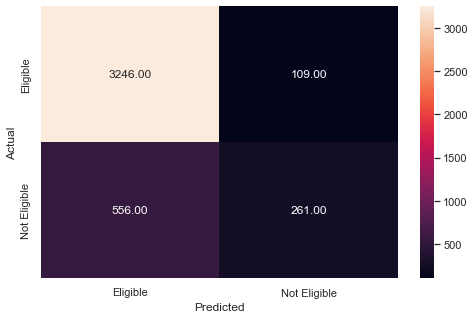

In [843]:
# LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# LDA Error Rate
lda_error_rate = (1 - lda.score(X_train, y_train))*100

print("LDA error rate while using only balance as a feature is {}% ".format(np.round(lda_error_rate, 2)))
y_pred_train_lda = lda.predict(X_train)
metrics_score(y_train,y_pred_train_lda)

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1416
           1       0.68      0.28      0.40       372

    accuracy                           0.82      1788
   macro avg       0.76      0.62      0.65      1788
weighted avg       0.80      0.82      0.79      1788



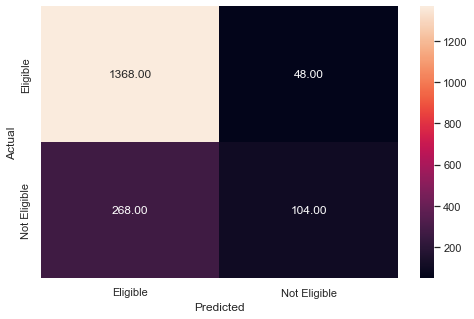

In [844]:
y_pred_test_lda = lda.predict(X_test)
metrics_score(y_test,y_pred_test_lda)

In [845]:
round(f1_score(y_test, y_pred_test_lda),3)
# Not a good F1 Score with LDA

0.397

**Insights**
* The Recall Rate is too low to really put the model as a good candidate unfortunately. (The Recall Rate is at 28%)

QDA error rate while using only balance as a feature is 18.31%
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      3355
           1       0.54      0.41      0.47       817

    accuracy                           0.82      4172
   macro avg       0.70      0.66      0.68      4172
weighted avg       0.80      0.82      0.81      4172



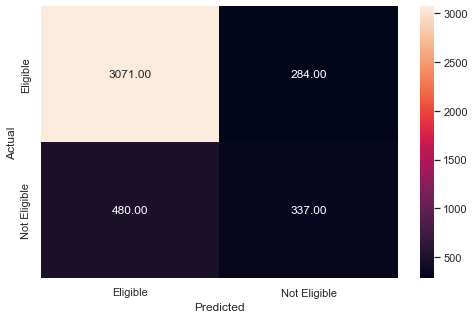

In [846]:
# QDA
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

# QDA Error Rate
qda_error_rate = (1 - qda.score(X_train, y_train))*100

print("QDA error rate while using only balance as a feature is {}%".format(np.round(qda_error_rate, 2)))
y_pred_train_qda = qda.predict(X_train)
metrics_score(y_train,y_pred_train_qda)

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1416
           1       0.53      0.40      0.45       372

    accuracy                           0.80      1788
   macro avg       0.69      0.65      0.67      1788
weighted avg       0.78      0.80      0.79      1788



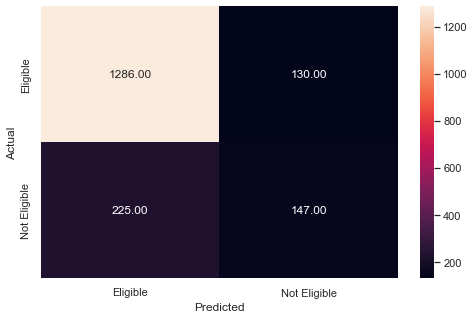

In [847]:
y_pred_test_qda = qda.predict(X_test)
metrics_score(y_test,y_pred_test_qda)

In [789]:
round(f1_score(y_test, y_pred_test_qda),3)

0.453

**Insights**
* While slightly better than LDA, the recall rate is at 40%, so this makes the model to not be an ideal candidate. It seems the model is affected by the bias of the model.

### **KNN** 

1
[0.0, 0.06655480984340045]
2
[0.06010306807286673, 0.10934004474272928]
3
[0.049829817833173536, 0.09446868008948542]
4
[0.0915268456375839, 0.12300335570469802]
5
[0.08280920421860022, 0.11346196868008951]
6
[0.11107622243528287, 0.13368568232662192]
7
[0.10345877277085334, 0.12690156599552574]
8
[0.12408197507190795, 0.14095637583892617]
9
[0.11798418024928091, 0.13672259507829979]
10
[0.13422579098753598, 0.14954697986577178]
11
[0.12884947267497604, 0.14555369127516782]
12
[0.14107861936720992, 0.15204138702460848]
13
[0.13717881112176417, 0.1515268456375839]
14
[0.14584851390220513, 0.15693512304250562]
15
[0.1437703739213806, 0.1540604026845637]


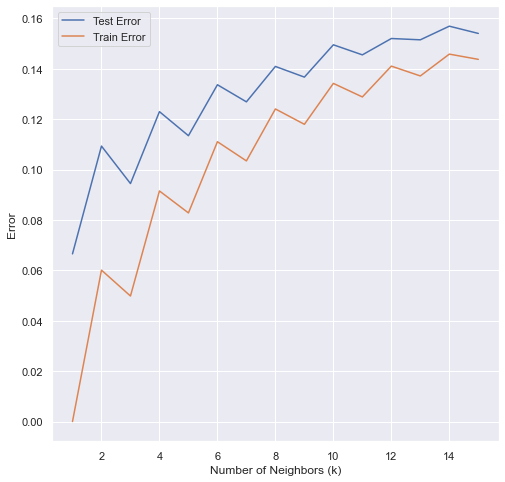

In [865]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
# We select the best value of k for which the error rate is the least in the validation data
# Let us loop over a few values of k to determine the best k 

train_error = []

test_error = []

knn_many_split = {}

error_df_knn = pd.DataFrame()


for k in range(1,16):
    
    train_error = []
    test_error = []
    lista = []
    knn = KNeighborsClassifier(n_neighbors = k)
    print(k)

    for i in range(100):
        x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

        # Let us scale the data. Notice the scaling done here.
        x_train = ss.fit_transform(x_train)
        x_test = ss.transform(x_test)
        
        # Fitting the K-NN model
        knn.fit(x_train, y_train)
        
        # Finding train and test errors
        train_error.append(1 - knn.score(x_train, y_train)) 
        test_error.append(1 - knn.score(x_test, y_test))
    
    lista.append(sum(train_error)/len(train_error))
    lista.append(sum(test_error)/len(test_error))
    knn_many_split[k] = lista
    print(knn_many_split[k])

knn_many_split

# Extracting k, the train error, and the test error in separate lists for easy plotting

kl = []
vl = []
v2 = []

for k, v in knn_many_split.items():
    
    kl.append(k)
    
    vl.append(knn_many_split[k][1])
    
    v2.append(knn_many_split[k][0])
    
# Plotting k vs train and test error
plt.figure(figsize = (8, 8))

plt.xlabel("Number of Neighbors (k)")

plt.ylabel("Error")

plt.plot(kl, vl, label = 'Test Error')

plt.plot(kl, v2, label = 'Train Error')

plt.legend()

plt.show()

**Insights**
* We are seeing an interesting observation of the error rate. Unfortunately, KNN seems unable to properly minimize the error rate for the best K values, and the we do not have a solid method to fit the model to determine the metrics score.

### **Build a Logistic Regression Model** 

In [790]:
# Defining the Logistic regression model (Default)
lr = LogisticRegression()

# Fitting the model on the training data 

lr.fit(X_train, y_train)

LogisticRegression()

In [791]:
lr_error_rate = (1 - lr.score(X_train, y_train))*100

print("Default Logistic Regression error rate using balance feature is {}% ".format(np.round(lr_error_rate, 2)))

Default Logistic Regression error rate using balance feature is 19.18% 


#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.90      0.79      0.84      3355
           1       0.43      0.66      0.52       817

    accuracy                           0.76      4172
   macro avg       0.67      0.72      0.68      4172
weighted avg       0.81      0.76      0.78      4172



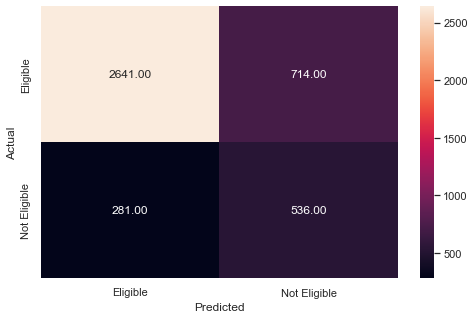

In [848]:
#Predict for train set
y_pred_train_lr = lr.predict(X_train)

#checking the performance on the train dataset
metrics_score(y_train,y_pred_train_lr)

              precision    recall  f1-score   support

           0       0.90      0.79      0.84      1416
           1       0.45      0.65      0.53       372

    accuracy                           0.76      1788
   macro avg       0.67      0.72      0.69      1788
weighted avg       0.80      0.76      0.78      1788



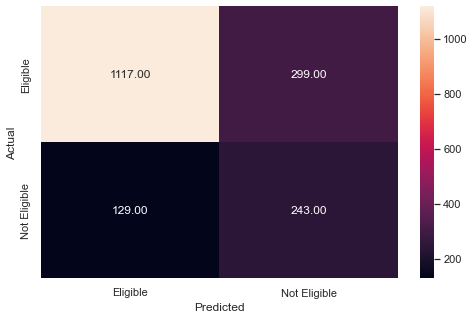

In [849]:
#Predict for test set
y_pred_test_lr = lr.predict(X_test)

#checking the performance on the test dataset

metrics_score(y_test,y_pred_test_lr)

###  **Version 2 Class Weight 20%, 80%**

Class Weighted Logistic Regression error rate using balance feature is 36.39% 

              precision    recall  f1-score   support

           0       0.89      0.62      0.73      3355
           1       0.31      0.69      0.42       817

    accuracy                           0.64      4172
   macro avg       0.60      0.65      0.58      4172
weighted avg       0.78      0.64      0.67      4172



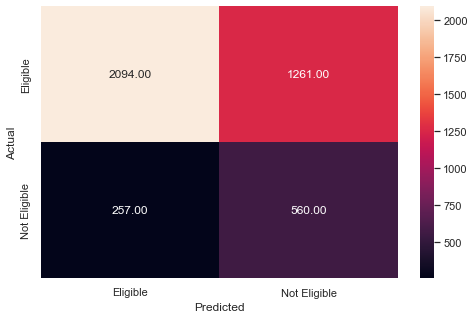

In [850]:
# Defining the Logistic regression model
lr = LogisticRegression(class_weight = {0:0.2, 1:0.8})

# Fitting the model on the training data 

lr.fit(X_train, y_train)

lr_error_rate = (1 - lr.score(X_train, y_train))*100

print("Class Weighted Logistic Regression error rate using balance feature is {}% \n".format(np.round(lr_error_rate, 2)))

#Predict for train set
y_pred_train_lr = lr.predict(X_train)

#checking the performance on the train dataset
metrics_score(y_train,y_pred_train_lr)

              precision    recall  f1-score   support

           0       0.88      0.63      0.73      1416
           1       0.32      0.67      0.43       372

    accuracy                           0.64      1788
   macro avg       0.60      0.65      0.58      1788
weighted avg       0.76      0.64      0.67      1788



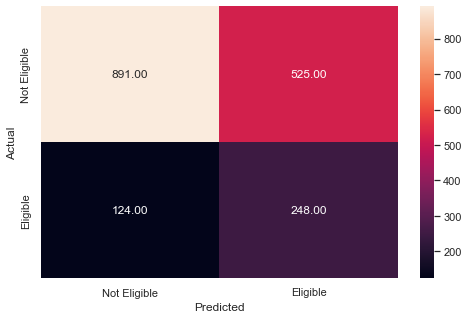

In [795]:
#Predict for test set
y_pred_test_lr = lr.predict(X_test)

#checking the performance on the test dataset

metrics_score(y_test,y_pred_test_lr)

### **Class weight with Newton-CG solver**

Newton-CG Logistic Regression error rate using balance feature is 23.85% 

              precision    recall  f1-score   support

           0       0.90      0.79      0.84      3355
           1       0.43      0.66      0.52       817

    accuracy                           0.76      4172
   macro avg       0.67      0.72      0.68      4172
weighted avg       0.81      0.76      0.78      4172



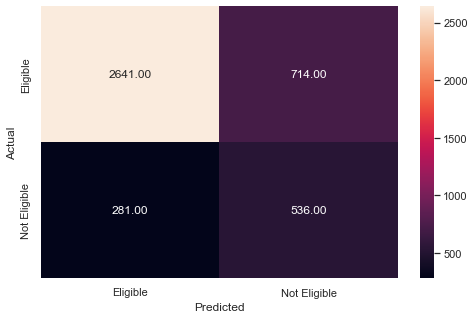

In [851]:
# Defining the Logistic regression model
lr = LogisticRegression(solver = 'newton-cg', class_weight = {0:0.2,1:0.8}, random_state = 1)

# Fitting the model on the training data 

lr.fit(X_train, y_train)

lr_error_rate = (1 - lr.score(X_train, y_train))*100

print("Newton-CG Logistic Regression error rate using balance feature is {}% \n".format(np.round(lr_error_rate, 2)))

#Predict for train set
y_pred_train_lr = lr.predict(X_train)

#checking the performance on the train dataset
metrics_score(y_train,y_pred_train_lr)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.90      0.79      0.84      1416
           1       0.45      0.65      0.53       372

    accuracy                           0.76      1788
   macro avg       0.67      0.72      0.69      1788
weighted avg       0.80      0.76      0.78      1788



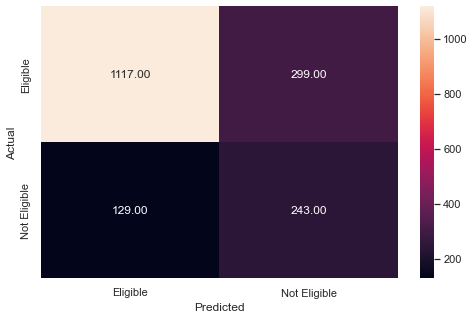

In [852]:
#Predict for test set
y_pred_test_lr = lr.predict(X_test)

#checking the performance on the test dataset

metrics_score(y_test,y_pred_test_lr)

**Observations:**
* After trying three different types of logistic regression, class weight was the best at `balanced`. The precision was at 88%, recall rate at 67%, and F1 Score at 63%.
* However, the error rate of 37% is not a good sign.
* While the model looks good on surface, we will have to observe if other models perform better.

#### Let's check the coefficients, and check which variables are important and how they affect the process of loan approval

In [798]:
a = []
b = []
for i in range(int(len(X_train.columns))):
    a.append(lr.coef_[0][i])
    b.append(X_train.columns[i])
pd.Series(data = np.exp(a) -1, index = b)

LOAN             -0.000015
MORTDUE          -0.000002
VALUE            -0.000001
YOJ              -0.012277
DEROG             0.858121
DELINQ            1.132578
CLAGE            -0.005218
NINQ              0.257851
CLNO             -0.022528
DEBTINC           0.079719
REASON_HomeImp    0.214566
JOB_Office       -0.510890
JOB_Other        -0.146148
JOB_ProfExe      -0.124555
JOB_Sales         1.045332
JOB_Self          0.260823
dtype: float64

**Insights**
* Holding everything else constant:
    * For each additional dollar of `LOAN`, the probability of the applicant default does not change as much (less than 0.01%).
    * For each additional dollar of `MORTDUE`, the probability of the applicant default does not change as much (less than 0.01%).
    * For each additional dollar of `VALUE`, the probability of the applicant default does not change as much (less than 0.01%).
    * For each additional year of employment `YOJ`, the probability of default decreases at around 1.2%.
    * For each additional unit of `DEROG`, the probability of default significantly goes up by 85.8%.
    * For each additional unit of `DELINQ`, the probability of default significantly increases by 113.3%.
    * For each additional `CLAGE`, the probability of default decreases by 0.52%.
    * For each additional `NINQ`, the probability of default increases by 25.8%.
    * For each additional `CLNO`, the probability of default decreases by 2.25%.
    * For each additional increase of the percentage ratio of `DEBTINC`, the probability of default increases by 7.97%.
    * If the applicant's `JOB` is `Office`, the probability of default decreases by 51%.
    * If the applicant's `JOB` is `Other`, the probaiblity of default decreases by 14.6%.
    * If the applicant's `JOB` is `ProfExe`, the probaiblity of default decreases by 12.5%.
    * If the applicant's `JOB` is `Sales`, the probaiblity of default increases by 104.5%.
    * If the applicant's `JOB` is `Self`, the probaiblity of default increases by 26.1%.

### **ROC Curve**

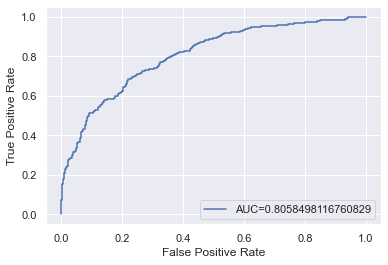

In [799]:
#define metrics
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

AUC was equal to 80.6%. Compared to the baseline at 50%, it seems that the logistic regression with the Newton Solver seems to be working.

### **Think about it:**
- The above Logistic regression model was build on the threshold of 0.5, can we use different threshold?
- How to get an optimal threshold and which curve will help you achieve?
- How does, accuracy, precision and recall change on the threshold?

### **Build a Decision Tree Model**

### **Think about it:**
- In Logistic regression we treated the outliers and built the model, should we do the same for tree based models or not? If not, why?

#### Data Preparation for the tree based model

In [ ]:
# # Add binary flags
# # List of columns that has missing values in it
# missing_col = [col for col in data.columns if data[col].isnull().any()]

# for colmn in missing_col:
#     add_binary_flag(data,colmn)
    

In [ ]:
# #  Treat Missing values in numerical columns with median and mode in categorical variables
# # Select numeric columns.
# num_data = data.select_dtypes('number')

# # Select string and object columns.
# cat_data = data.select_dtypes('category').columns.tolist()

# # Fill numeric columns with median.
# # Remove _________ and complete the code
# data[num_data.columns] = num_data._________________

# # Fill object columns with model.
# # Remove _________ and complete the code
# for column in cat_data:
#     mode = data[column].mode()[0]
#     data[column] = data[column].____________

#### Split the data

In [800]:
#Defining Decision tree model with class weights class_weight={0: 0.2, 1: 0.8}
d_tree =  DecisionTreeClassifier(class_weight = {0: 0.2, 1: 0.8}, random_state = 1,  criterion = 'gini')

In [801]:
#fitting Decision tree model
d_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



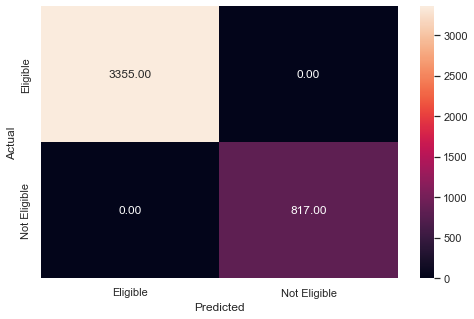

In [853]:
# Checking performance on the training data
y_pred_train_dtree = d_tree.predict(X_train)

metrics_score(y_train, y_pred_train_dtree)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1416
           1       0.72      0.60      0.65       372

    accuracy                           0.87      1788
   macro avg       0.81      0.77      0.79      1788
weighted avg       0.86      0.87      0.86      1788



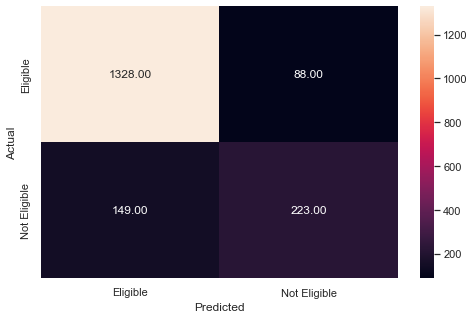

In [854]:
# Checking performance on the testing data
y_pred_test_dtree = d_tree.predict(X_test)

metrics_score(y_test, y_pred_test_dtree)

**Insights**
* With the decision tree model, precision was at 90% and recall was at 60%. F1 Score was at 86%, so while recall rate shows poorer performance compared to the logistic regression, the overall F1 score is showing a much sturdier performance compared to logistic regression.

### **Think about it:**
- Can we improve this model? 
- How to get optimal parameters in order to get the best possible results?

### **Decision Tree - Hyperparameter Tuning**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion {“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth** 

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

You can learn about more Hyperpapameters on this link and try to tune them. 

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


#### Using GridSearchCV for Hyperparameter tuning on the model

In [807]:
# Choose the type of classifier. 
d_tree_tuned = DecisionTreeClassifier(class_weight = {0: 0.2, 1: 0.8}, random_state = 1)


# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 8), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5,10,15,20,25],
              'min_impurity_decrease' : [0.001,0.005,0.0001]
             }


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)


# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Fit the GridSearch on train dataset
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_


# Fit the best algorithm to the data. 
d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, criterion='entropy',
                       max_depth=5, min_impurity_decrease=0.005,
                       min_samples_leaf=10, random_state=1)

In [808]:
d_tree_tuned_error_rate = (1 - d_tree_tuned.score(X_train, y_train))*100

print("Tuned Decision Tree error rate using balance feature is {}% \n".format(np.round(d_tree_tuned_error_rate, 2)))


Tuned Decision Tree error rate using balance feature is 14.5% 



#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.94      0.88      0.91      3355
           1       0.60      0.77      0.67       817

    accuracy                           0.85      4172
   macro avg       0.77      0.82      0.79      4172
weighted avg       0.87      0.85      0.86      4172



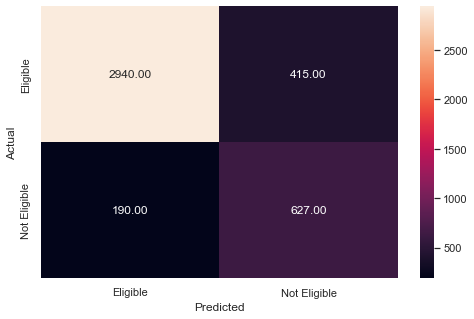

In [855]:
# Checking performance on the training data based on the tuned model
y_pred_train_dtree_tuned = d_tree_tuned.predict(X_train)

metrics_score(y_train,y_pred_train_dtree_tuned)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.93      0.88      0.90      1416
           1       0.62      0.73      0.67       372

    accuracy                           0.85      1788
   macro avg       0.77      0.81      0.79      1788
weighted avg       0.86      0.85      0.86      1788



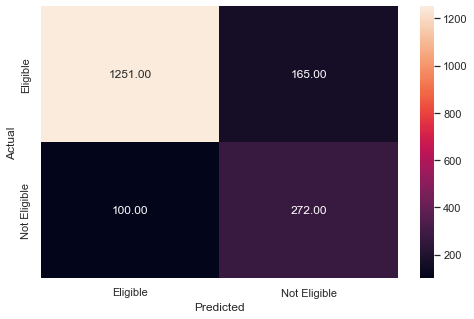

In [856]:
# Checking performance on the testing data based on the tuned model
y_pred_test_dtree_tuned = d_tree_tuned.predict(X_test)

metrics_score(y_test,y_pred_test_dtree_tuned)

**Insights**
* While tuning the model enables precision (94%) and recall (79%) rate to be better, the overall accuracy of F1 Score decreases to 82% because it fails to identify False Negative and False Positive properly.
* Overall, the goal is to take different factors (TP, TN, FP, FN) into account, and in this case F1 Score will be the key measurement.

#### Plotting the Decision Tree

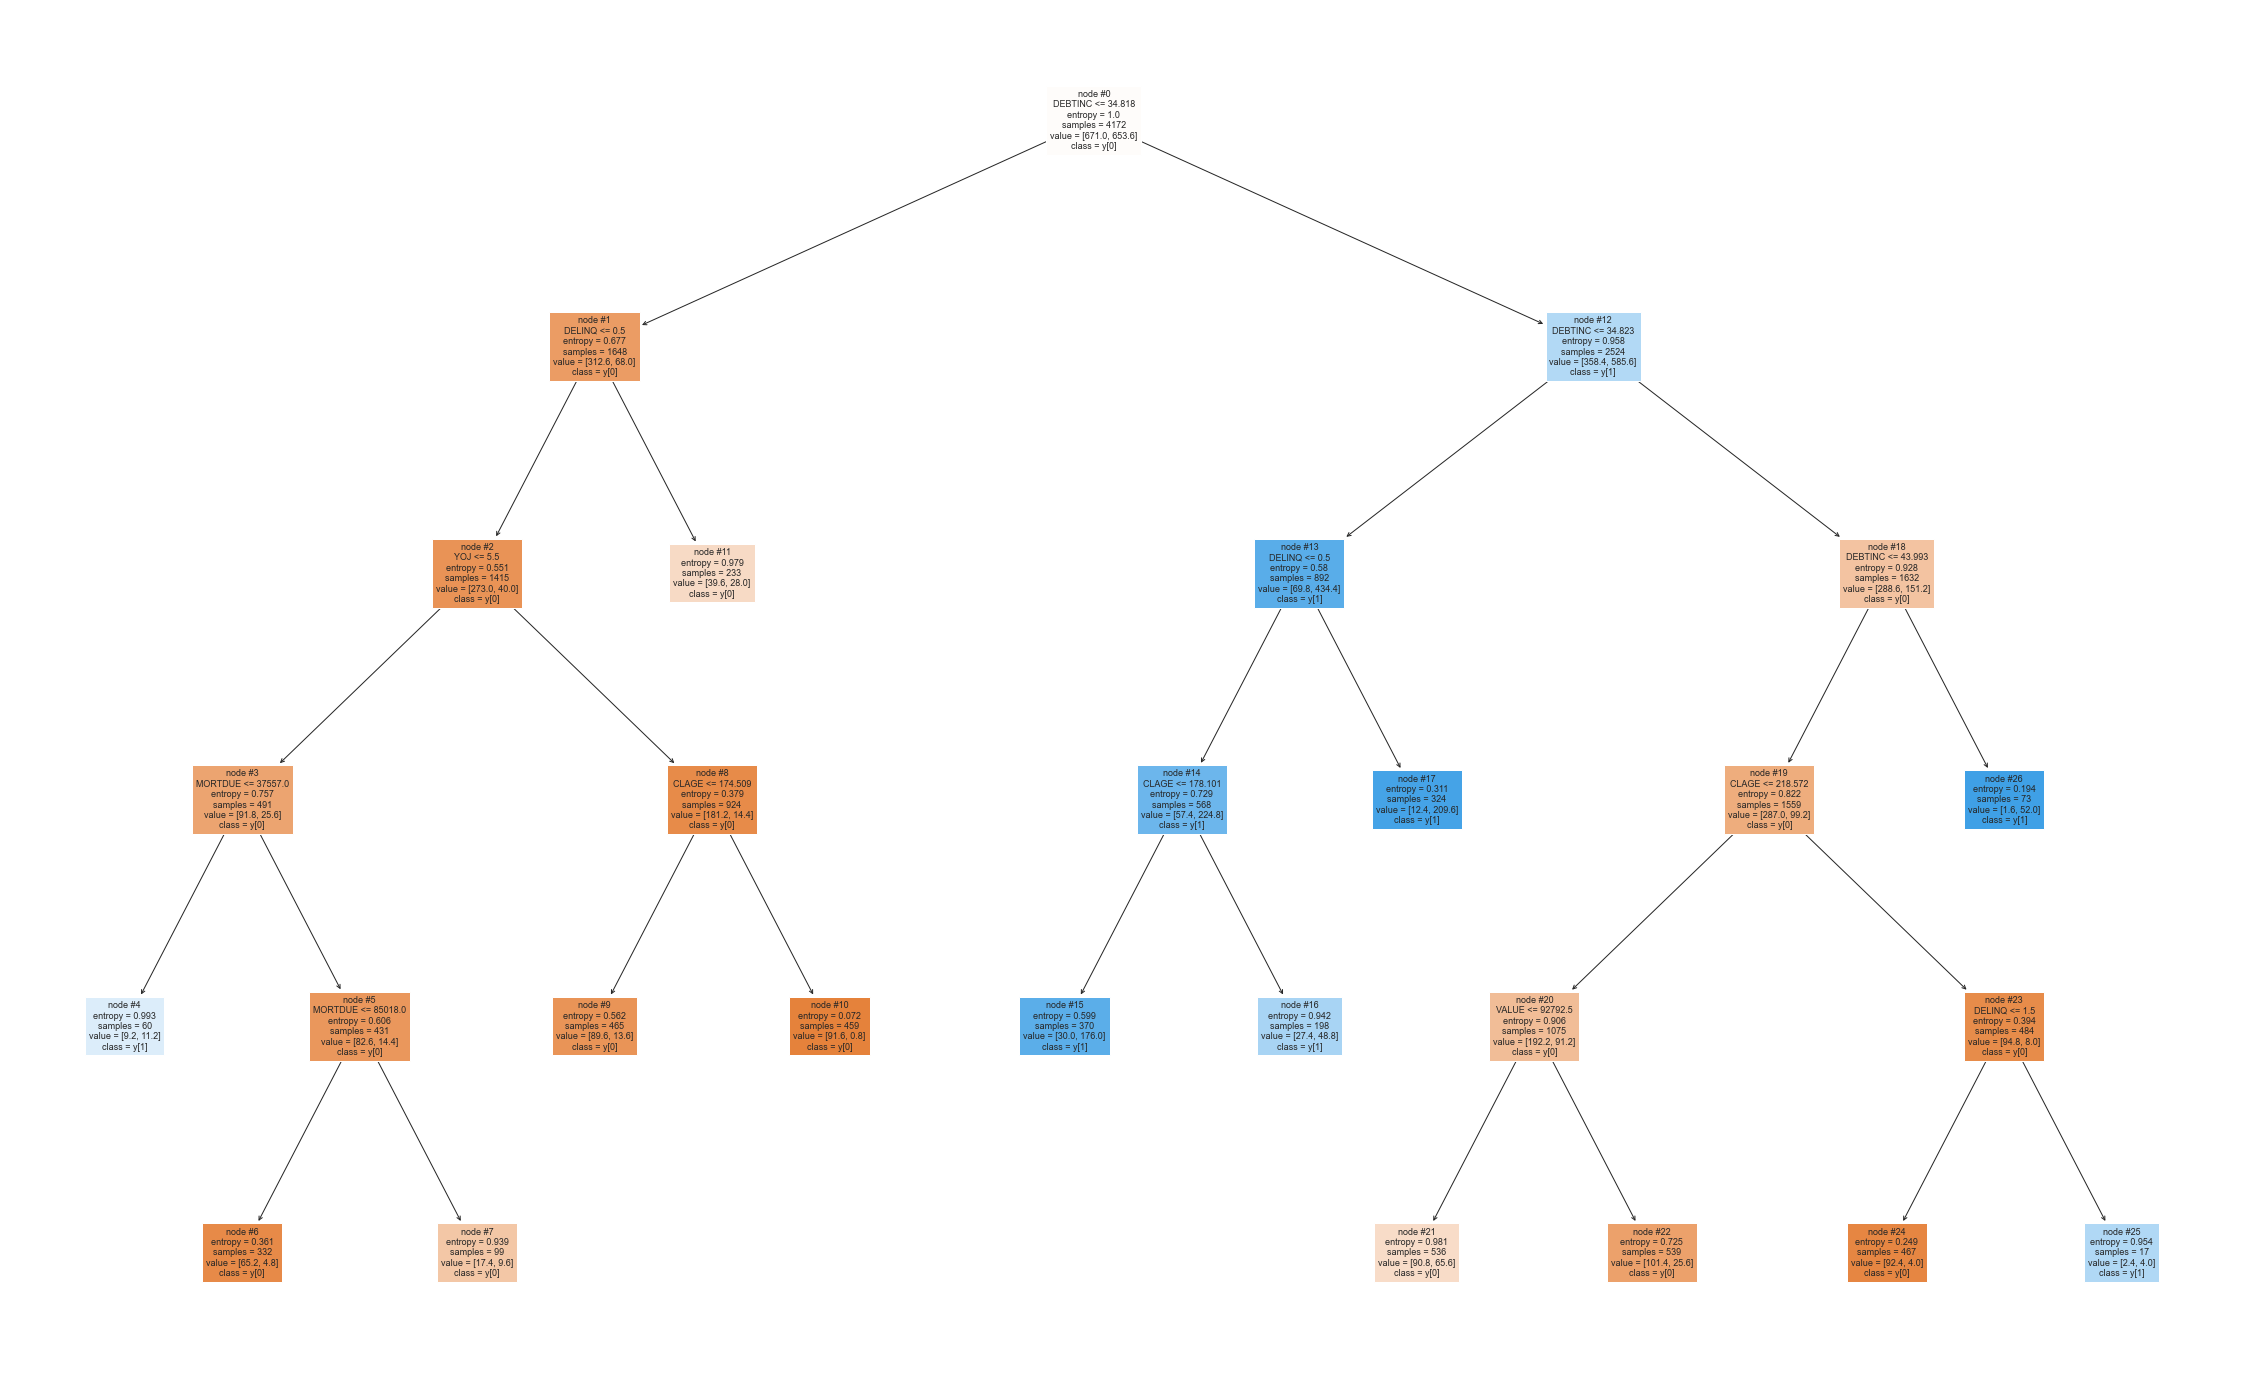

In [811]:
# Plot the decision  tree and analyze it to build the decision rule
features = list(X.columns)

plt.figure(figsize=(40,25))

tree.plot_tree(d_tree_tuned, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)

plt.show()

#### Deduce the business rules apparent from the Decision Tree and write them down: 
* Blue means the increased probability of the applicant defaulting.
* Even if `DEBTINC` ratio is less than 34.8%, if the `DELINQ` >= 1.5, `CLNO` <= 26.5, and `VALUE` of the proprty <+ 85.2K dollars, the chance of defaulting increases.
* If the `DEBTINC` is ultimately greater than 43.7%, the probability of defaulting increases significantly.
* It seems that if `DEBTINC` is around 34.82%, unless the `YOJ` is between 5.4 and 11.5 years, a majority of applicants has shown histories of defaulting. In a way, `DEBTINC` has the biggest impact in the probability of defaulting.
* In a way, `DEBTINC` is the key feature that we need to keep the respective data at all times. If the person does not provide the `DEBTINC`, it will be difficult to approved the loan as it determins whether we have to approve the applicant or not.

### **Building a Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction. 

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

In [139]:
# Defining Random forest Classifier
rf_estimator = RandomForestClassifier(random_state = 1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



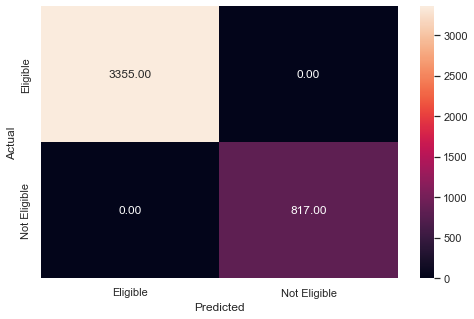

In [140]:
#Checking performance on the training data
rf_estimator.fit(X_train,y_train)

y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train,y_pred_train_rf)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1416
           1       0.90      0.66      0.76       372

    accuracy                           0.91      1788
   macro avg       0.91      0.82      0.85      1788
weighted avg       0.91      0.91      0.91      1788



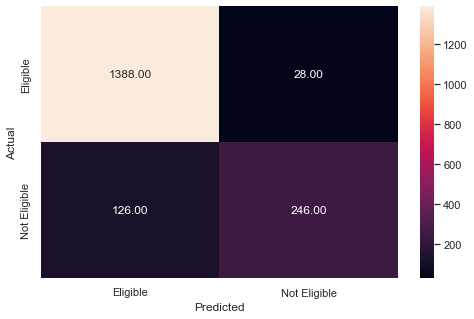

In [141]:
# Checking performance on the test data
y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test,y_pred_test_rf)

**Observations:**
* Random Forest (Default) is showing overall the best Precision and Recall Rate (92% and 66% respectively) with the F1 Score at 91%.

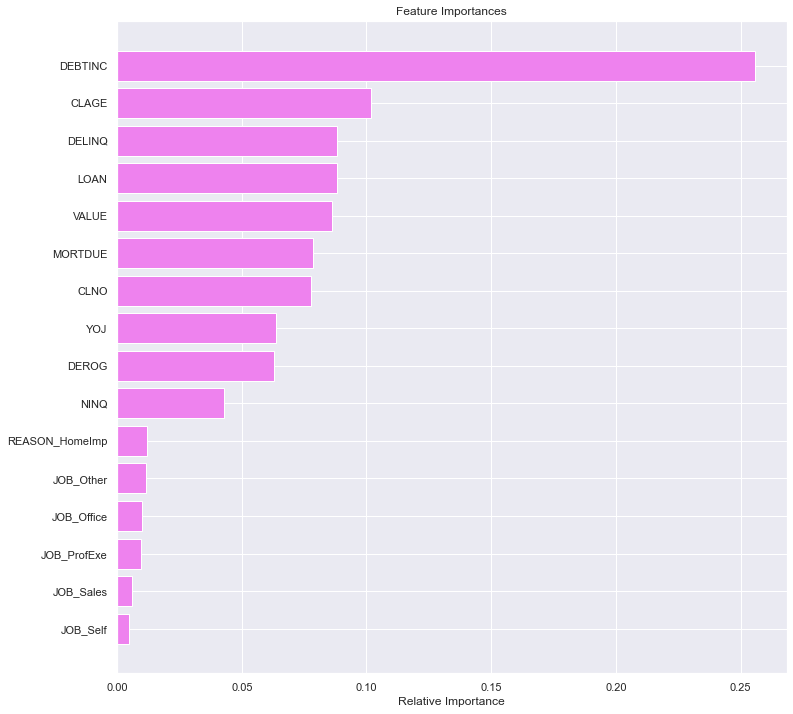

In [142]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
# Checking performace on test dataset

importances = rf_estimator.feature_importances_

indices = np.argsort(importances)

feature_names = list(X.columns)

plt.figure(figsize = (12, 12))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

* `DEBTINC` is showing the most importance, with `CLAGE` coming in 2nd place.
* It seems that `DELINQ` and `LOAN` are showing same importance at 3rd place, with `VALUE` coming at the close 5th place.

### **Build a Random Forest model with Class Weights**

In [143]:
# Defining Random Forest model with class weights class_weight={0: 0.2, 1: 0.8}
rf_estimator2 = RandomForestClassifier(random_state = 1, class_weight = {0: 0.2, 1: 0.8})

# Fitting Random Forest model
rf_estimator2.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



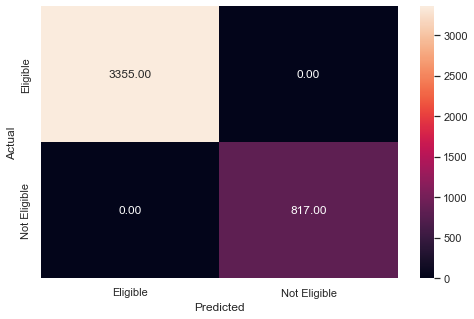

In [144]:
# Checking performance on the train data
y_pred_train_rf2 = rf_estimator.predict(X_train)

metrics_score(y_train,y_pred_train_rf2)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1416
           1       0.90      0.66      0.76       372

    accuracy                           0.91      1788
   macro avg       0.91      0.82      0.85      1788
weighted avg       0.91      0.91      0.91      1788



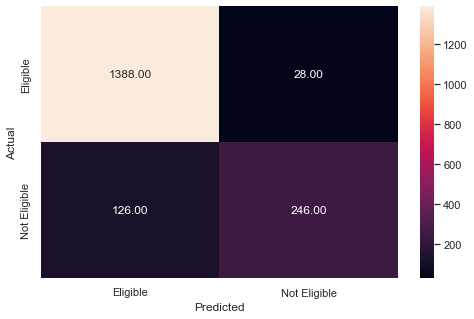

In [145]:
# Checking performance on the test data
y_pred_test_rf2 = rf_estimator.predict(X_test)

metrics_score(y_test,y_pred_test_rf2)

In [819]:
f1_score(y_test, y_pred_test_rf2)

0.7616099071207431

The class weight seems not to have changed the score of Precision, Recall, and F1 Score.

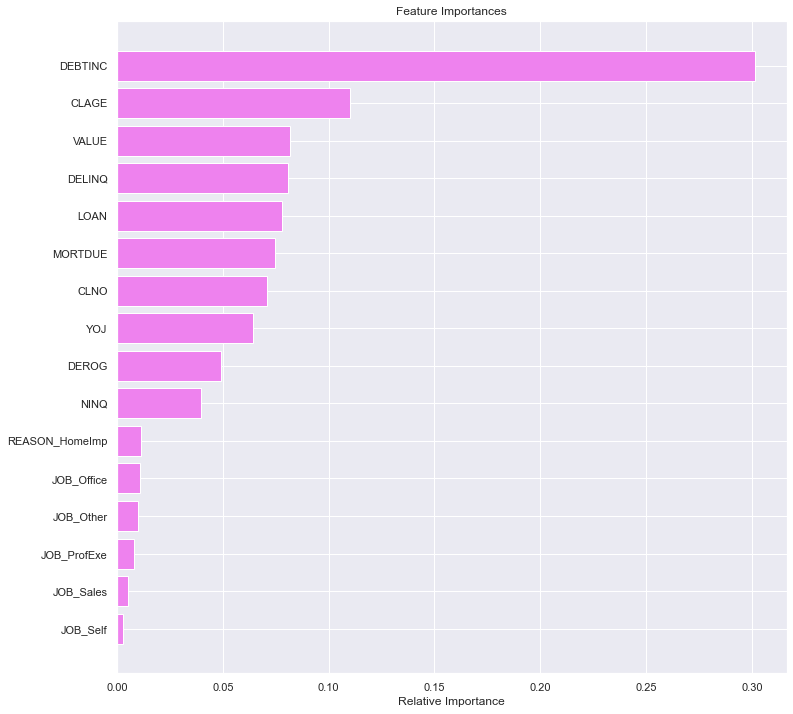

In [148]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
# Checking performace on test dataset

importances = rf_estimator2.feature_importances_

indices = np.argsort(importances)

feature_names = list(X.columns)

plt.figure(figsize = (12, 12))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

The importance seems to not have changed significantly from the above; `DEBTINC` was number 1, `CLAGE` following after. Interestingly, `VALUE` showed slightly more importance in the applicant defaulting compared to `DELINQ`.

### **Think about it:**
- Can we try different weights?
- If yes, should we increase or decrease class weights for different classes? 

### **Tuning the Random Forest**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.


**n_estimators**: The number of trees in the forest.

**min_samples_split**: The minimum number of samples required to split an internal node:

**min_samples_leaf**: The minimum number of samples required to be at a leaf node. 

**max_features{“auto”, “sqrt”, “log2”, 'None'}**: The number of features to consider when looking for the best split.

- If “auto”, then max_features=sqrt(n_features).

- If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).

- If “log2”, then max_features=log2(n_features).

- If None, then max_features=n_features.

You can learn more about Random Forest Hyperparameters from the link given below and try to tune them

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

#### **Warning:** This may take a long time depending on the parameters you tune. 

In [830]:
# Choose the type of classifier. 
rf_estimator_tuned = RandomForestClassifier(criterion = 'entropy', random_state = 1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [110, 120],
    "max_depth": [6, 7],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight": [{0: 0.2, 1: 0.8}]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)

#fit the GridSearch on train dataset
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_


# Fit the best algorithm to the data. 
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, criterion='entropy',
                       max_depth=6, max_features=0.8, max_samples=0.9,
                       min_samples_leaf=20, n_estimators=110, random_state=1)

In [831]:
rf_estimator_tuned_error_rate = (1 - rf_estimator_tuned.score(X_train, y_train))*100

print("Logistic Regression error rate using balance feature is {}% \n".format(np.round(rf_estimator_tuned_error_rate, 2)))

Logistic Regression error rate using balance feature is 11.74% 



#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.95      0.90      0.93      3355
           1       0.67      0.79      0.73       817

    accuracy                           0.88      4172
   macro avg       0.81      0.85      0.83      4172
weighted avg       0.89      0.88      0.89      4172



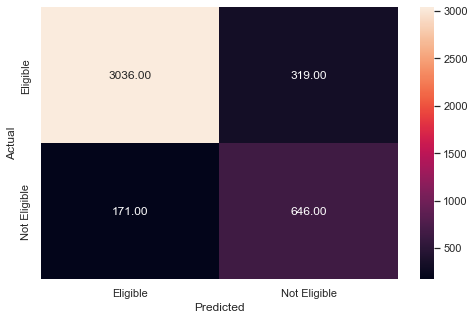

In [861]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train_rf_tuned)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1416
           1       0.68      0.73      0.70       372

    accuracy                           0.87      1788
   macro avg       0.80      0.82      0.81      1788
weighted avg       0.88      0.87      0.87      1788



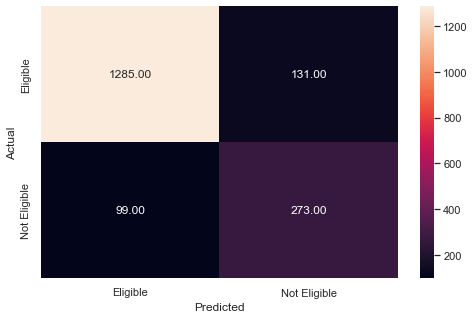

In [862]:
# Checking performace on test dataset
y_pred_test_rf_tuned = rf_estimator_tuned.predict(X_test)

metrics_score(y_test, y_pred_test_rf_tuned)

**Insights:**
* We've tried multiple types of Random Forest tuning, but the Precion, Recall, and F1 Score were slightly better with the Default Random Forest instead of tuning.
* Interestingly, both Decision Tree and Random Forest showed that tuning the model do not necessarilty result in a better F1 Score result.

#### Plot the Feature importance of the tuned Random Forest

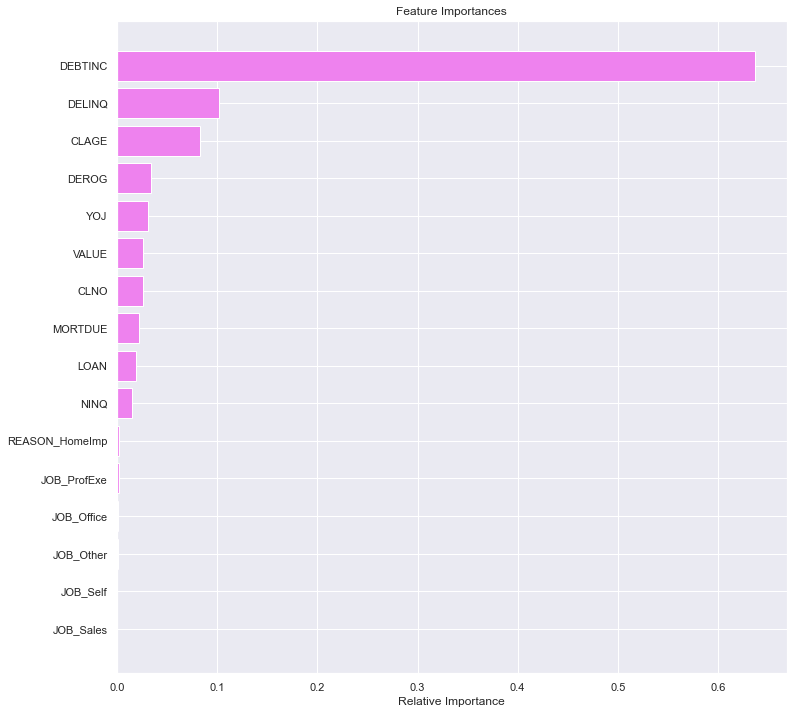

In [863]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
# Checking performace on test dataset

importances = rf_estimator_tuned.feature_importances_

indices = np.argsort(importances)

feature_names = list(X.columns)

plt.figure(figsize = (12, 12))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

### **Think about it:**
- We have only built 3 models so far, Logistic Regression, Decision Tree and Random Forest 
- We can build other Machine Learning classification models like kNN, LDA, QDA or even Support Vector Machines (SVM).
- Can we also perform feature engineering and create model features and build a more robust and accurate model for this problem statement? 

### **Comparing Model Performances**

In [835]:
def get_recall_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    a.append(train_recall) # adding train recall to list 
    a.append(test_recall) # adding test recall to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
    
    return a # returning the list with train and test scores

In [836]:
##  Function to calculate precision score
def get_precision_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return b # returning the list with train and test scores

In [837]:
##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
    
    return c # returning the list with train and test scores

In [838]:
##  Function to calculate f1 score
def get_f1_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    d = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_f1 = metrics.f1_score(y_train,pred_train)
    test_f1 = metrics.f1_score(y_test,pred_test)
    d.append(train_f1) # adding train f1 score to list
    d.append(test_f1) # adding test f1 score to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.f1_score(y_train,pred_train))
        print("Accuracy on test set : ",model.f1_score(y_test,pred_test))
    
    return d # returning the list with train and test scores

In [839]:
# Make the list of all the model names 

models = [lda,qda,lr,d_tree,d_tree_tuned,rf_estimator,rf_estimator2,rf_estimator_tuned]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
     # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])

    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])

    # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])
    
    # f1 score
    m = get_f1_score(model,False)
    f1_train.append(m[0])
    f1_test.append(m[1])

In [864]:
## Mention the Model names in the list. for example 'Model': ['Decision Tree', 'Tuned Decision Tree'..... write tht names of all model built]

comparison_frame = pd.DataFrame({'Model':['LDA','QDA','Logistic Regression Newton-CG','Default Decision Tree','Tuned Decision Tree','Default Random Forest','Random Forest w/ Class Weight','Tuned Random Forest'], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test,
                                          'Train_F1_Score': f1_train,
                                          'Test_F1_Score': f1_test}) 
comparison_frame

Model  Train_Accuracy  Test_Accuracy  Train_Recall  \
0                            LDA        0.840604       0.823266      0.319461   
1                            QDA        0.816874       0.801454      0.412485   
2  Logistic Regression Newton-CG        0.761505       0.760626      0.656059   
3          Default Decision Tree        1.000000       0.867450      1.000000   
4            Tuned Decision Tree        0.854986       0.851790      0.767442   
5          Default Random Forest        1.000000       0.913870      1.000000   
6  Random Forest w/ Class Weight        1.000000       0.909955      1.000000   
7            Tuned Random Forest        0.882550       0.871365      0.790698   

   Test_Recall  Train_Precision  Test_Precision  Train_F1_Score  Test_F1_Score  
0     0.279570         0.705405        0.684211        0.439764       0.396947  
1     0.395161         0.542673        0.530686        0.468707       0.453005  
2     0.653226         0.428800        0.448339        0.518626       0.531729  
3     0.599462         1.000000        0.717042        1.000000       0.653001  
4     0.731183         0.601727        0.622426        0.674556       0.672435  
5     0.661290         1.000000        0.897810        1.000000       0.761610  
6     0.639785         1.000000        0.898113        1.000000       0.747253  
7     0.733871         0.669430        0.675743        0.725028       0.703608

**Insights:**
* The best model came from Random Forest without any Class Weight or Fine Tuning. While both Precision and Recall are imnportant, the key factor in predicting the applicant default and correctly identifying the actual applicant defaulting will be the Accuracy which is at 91% for the best model.